### <p style="background-color:#627D50;color:#D1CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 5** : Segmentez des clients d'un site e-commerce </p>

<img src="Olist.png" align="left" alt="Alternative text" />

Vous êtes consultant pour ***Olist***, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

***Olist*** souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre ***objectif*** est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

---
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientiste*]()
- Ecole [*OpenClassrooms*]()

---

## <a id='-1'> <font color='#114b98' font-size='110%' text-align='left'> Sommaire </font> </a>
----------

[<font color="#337da4"> <h5> 1. Librairies](#1)</h5>
[<font color="#337da4"> <h5> 2. Bases de données](#2)</h5>
> [2.1 Chargement des bases](#2.1)<br>
> [2.2 Description des datasets](#2.2)<br>
    
[<font color="#337da4"> <h5> 3. Nettoyage des données](#3)</h5>
> [3.1. Les clients (df_customers)](#3.1)<br>
> [3.2. Les données geolocatisation (df_geolocation)](#3.2)<br>
> [3.3. Les commandes (df_orders)](#3.3)<br>
> [3.4. Les articles (df_order_items)](#3.4)<br>
> [3.5. Les paiements (df_order_payments)](#3.5)<br>
> [3.6. Satisfaction clients (df_order_reviews)](#3.6)<br>
> [3.7. Les produits (df_products)](#3.7)<br>
> [3.8. Les vendeurs (df_sellers)](#3.8)<br>
> [3.9. Les catégories de produits (df_category_name)](#3.9)<br>
    
[<font color="#337da4"> <h5> 4. Exploration](#4)</h5>
[<font color="#337da4"> <h5>  5. Fusion des bases](#5)</h5>
[<font color="#337da4"> <h5> 6. Features engineering ](#6)</h5>
[<font color="#337da4"> <h5> 7. Variables RFM](#7)</h5>
[<font color="#337da4"> <h5> 8. Selection de variables](#8)</h5>
[<font color="#337da4"> <h5> 9. Exportation des bases](#9)</h5>

### <font color="#337da4" id="1">1. Librairies </font>
----------------------------

In [1]:
import os
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import missingno as msno

# from pivottablejs import pivot_ui
# from IPython.display import HTML
# from pandas_profiling import ProfileReport
from IPython.display import display, Markdown
# from matplotlib.lines import Line2D

# Appel de mes propres functions
from function import *

# plt.style.use('ggplot')


# Affichage des valeurs
pd.set_option('display.max_colwidth', None)

# !pip install dataframe_to_image
import dataframe_image as dfi
imgPath='D:/OpenClassrooms/Projet 5/Soutenance/'

font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 16,}
font_title2 = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 12,}
font_title3 = {'family': 'serif', 'color':  '#4F6272', 'weight': 'bold', 'size': 10,}

mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99','#66b3ff','#4F6272', '#B7C3F3','#ff9999','#ffcc99','#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0','#DDA0DD','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33',
           '#a65628','#f781bf',"#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

%matplotlib inline
# https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [2]:
# !pip install dataframe_image --no-warn-script-location

### <font color="#337da4" id="2">2. Bases de données </font>
----------------------------
#### <font color="#337da4" id="2.1">2.1 Chargement des bases </font>
Nous allons charger l'ensemble des données

In [3]:
import os
from IPython.display import display
bases=[]
# Repertoire de travail
dir_name = 'C:/Users/Fane0763/OpenClassroom/OC Projet 5/bases'
dict_df = {}

# Importation des fichiers (bases)
for file_name in os.listdir(dir_name):
    if file_name[-4:] == '.csv':
        file_path = os.path.join(dir_name, file_name)
        tabname='df_'+(file_name[:-4].rsplit('_', 1)[0]).split('_', 1)[1]
        dict_df[tabname] = pd.read_csv(file_path)
        globals()[tabname] = pd.read_csv(file_path)
        bases.append(tabname)

Nous allons afficher les dataframes

In [4]:
# Affichage des dataframes
for name, data in dict_df.items():
    display(Markdown('------------------------------------'))       
    display(Markdown('#### ***' +name+'***'))
    display(Markdown('------------------------------------'))

    display(data.head(5))

------------------------------------

#### ***df_customers***

------------------------------------

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


------------------------------------

#### ***df_geolocation***

------------------------------------

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


------------------------------------

#### ***df_orders***

------------------------------------

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


------------------------------------

#### ***df_order_items***

------------------------------------

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


------------------------------------

#### ***df_order_payments***

------------------------------------

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


------------------------------------

#### ***df_order_reviews***

------------------------------------

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


------------------------------------

#### ***df_products***

------------------------------------

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


------------------------------------

#### ***df_sellers***

------------------------------------

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


------------------------------------

#### ***df_category_name***

------------------------------------

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### <font color="#337da4" id="2.2">2.2 Description des datasets </font>

#### Les clients (df_customers): informations sur les clients, et leur origine
--------------------------------------------------

> **customer_id** : Clé dans le dataset des commandes  
> **customer_unique_id** : Identifiant unique du client  
> **customer_state** : Etat du client   

--------------------------------------------------
* **df_orders**: informations relatives commandes et aux métadonnées
 * **variable target** : order_id 
 

 
--------------------------------------------------
* **df_orders_item**: informations sur le contenu des commandes
 * **variable target** : order_id , customer_id, seller_id, 
--------------------------------------------------
* **df_order_review**: informations sur les commentaires des commandes
 * **variable target** : order_id, review_score   
--------------------------------------------------
* **df_products**: informations sur les produits, nom, taille, photos
 * **variable target** : product_id, product_category_name
--------------------------------------------------
* **df_payments**: informations sur les paiements, montant, echelonnés ou pas, payé avec bon d'achat ou non  
 * **variable target** : product_id, product_category_name

--------------------------------------------------
* **df_sellers**: informations sur les vendeurs, localisation
 * **variable target** :  seller_id
--------------------------------------------------
* **df_geolocation**: informations sur la localisation des code postaux et villes utilisés dans les autres dataset
 * **variable target** : zip code
--------------------------------------------------
* **df_category_name**: traduction en anglais des noms de produits
 * **variable target** :  product name    
 
--------------------------------------------------

In [5]:
def get_dataframe_name(df):
    '''
    Cette fonction retourne le nom du dataframe en string
    :param df: dataframe
    :return: nom du dataframe en format string
    '''
    name =[x for x in globals() if globals()[x] is df]
    return name[0]

# namestr(df_customers,globals())

In [6]:
datasets=[df_customers, df_geolocation, df_orders, df_order_items,df_order_payments, 
              df_order_reviews, df_products, df_sellers, df_category_name]

# BaseNameString=[namestr(data,globals()) for data in datasets]
BaseNameString=[get_dataframe_name(data) for data in datasets]
# print(BaseNameString)
# for data in datasets:
#     print(get_dataframe_name(data))
    
description=apercu(datasets, BaseNameString)
description2=apercu2(datasets, BaseNameString)
dfi.export(description2, imgPath+'datasets.png')
description

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,df_geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,df_orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,df_order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
4,df_order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
5,df_order_reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
6,df_products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,df_sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,df_category_name,"product_category_name, product_category_name_english",71,2,0,0,


<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Ce tableau de syhthèse donne les informations sur l'ensemble des bases de données <b><i>Olist</i></b>.
<li> Seule la table <b><i>df_geolocation</i></b> presente des doublons. </li>
<li> Trois (3) tables présentent des valeurs manquantes: <b><i>df_orders, df_order_items et df_products</i></b> </li>
</p></span></div>

In [7]:
def infoDataFrame(data):
    """
    Cette fonction affiche les stats relatives a la dataframe en entrée
    :param data: dataframe pandas
    :return: dataframe avec nombre de lignes et de colonnes et des infos sur le dataframe
    """
    display(Markdown('------------------------------------'))
    display(Markdown('#### Info génerales sur la base : **{0}**'.format(get_dataframe_name(data))))
    display(Markdown('------------------------------------'))
    # print('--------------------------------------------------------------------------')
    # print('Info générales sur la base : {0}'.format(namestr(data, globals())))
    data.info()
    print(" ")
    print(" ")
    nb_ligne = data.shape[0]
    nb_colonne = data.shape[1]
    display(Markdown('Le jeu de données ***{}*** a {} lignes et {} colonnes.'.format(get_dataframe_name(data),
                                                                    nb_ligne, nb_colonne)))
    df = pd.DataFrame({'Variable': ['lignes', 'colonnes'], 'nombre': [nb_ligne, nb_colonne]})
    print(" ")
    # display(df)
    return df

infoDataFrame(df_customers)

------------------------------------

#### Info génerales sur la base : **df_customers**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
 
 


Le jeu de données ***df_customers*** a 99441 lignes et 5 colonnes.

,Variable,nombre
0,lignes,99441
1,colonnes,5


In [8]:
infoDataFrame(df_geolocation)

------------------------------------

#### Info génerales sur la base : **df_geolocation**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
 
 


Le jeu de données ***df_geolocation*** a 1000163 lignes et 5 colonnes.

,Variable,nombre
0,lignes,1000163
1,colonnes,5


In [9]:
infoDataFrame(df_orders)

------------------------------------

#### Info génerales sur la base : **df_orders**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
 
 


Le jeu de données ***df_orders*** a 99441 lignes et 8 colonnes.

,Variable,nombre
0,lignes,99441
1,colonnes,8


In [10]:
infoDataFrame(df_order_items)

------------------------------------

#### Info génerales sur la base : **df_order_items**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
 
 


Le jeu de données ***df_order_items*** a 112650 lignes et 7 colonnes.

,Variable,nombre
0,lignes,112650
1,colonnes,7


In [11]:
infoDataFrame(df_order_payments)

------------------------------------

#### Info génerales sur la base : **df_order_payments**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
 
 


Le jeu de données ***df_order_payments*** a 103886 lignes et 5 colonnes.

,Variable,nombre
0,lignes,103886
1,colonnes,5


In [12]:
infoDataFrame(df_order_reviews)

------------------------------------

#### Info génerales sur la base : **df_order_reviews**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
 
 


Le jeu de données ***df_order_reviews*** a 99224 lignes et 7 colonnes.

,Variable,nombre
0,lignes,99224
1,colonnes,7


In [13]:
infoDataFrame(df_products)

------------------------------------

#### Info génerales sur la base : **df_products**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
 
 


Le jeu de données ***df_products*** a 32951 lignes et 9 colonnes.

,Variable,nombre
0,lignes,32951
1,colonnes,9


In [14]:
infoDataFrame(df_sellers)

------------------------------------

#### Info génerales sur la base : **df_sellers**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
 
 


Le jeu de données ***df_sellers*** a 3095 lignes et 4 colonnes.

,Variable,nombre
0,lignes,3095
1,colonnes,4


In [15]:
infoDataFrame(df_category_name)

------------------------------------

#### Info génerales sur la base : **df_category_name**

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
 
 


Le jeu de données ***df_category_name*** a 71 lignes et 2 colonnes.

,Variable,nombre
0,lignes,71
1,colonnes,2


In [16]:
list_dfs=[]
for df in bases:
    df1=globals()[df]
    list_dfs.append(df1.describe().round(2))
    print(df)
    print('--'*50)
    display(df1.describe())
    
# grid_df_display(list_dfs, rows = 9, cols=1)

df_customers
----------------------------------------------------------------------------------------------------


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


df_geolocation
----------------------------------------------------------------------------------------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


df_orders
----------------------------------------------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


df_order_items
----------------------------------------------------------------------------------------------------


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


df_order_payments
----------------------------------------------------------------------------------------------------


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


df_order_reviews
----------------------------------------------------------------------------------------------------


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


df_products
----------------------------------------------------------------------------------------------------


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


df_sellers
----------------------------------------------------------------------------------------------------


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


df_category_name
----------------------------------------------------------------------------------------------------


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### <font color="#337da4" id="3">3. Nettoyage des données </font>
-------------------------------------------

#### <font color='#337da4' text-align='left'> 3.1. Les clients (df_customers) <a id="3.1"></a></font>

> **customer_id** : Clé dans le dataset des commandes  
> **customer_unique_id** : Identifiant unique du client  
> **customer_state** : Etat du client   
> **customer_city** :  Ville de residence du client  
> **customer_zip_code_prefix** : ZIP code 

Le client est identifé par **customer_unique_id**. Cependant, le meme client dispose d'un **customer_id** par commande. Donc, un **customer_unique_id** peut être rattaché à plusieurs **customer_id**.

In [17]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
df_customers2=df_customers[['customer_unique_id', 'customer_state']].drop_duplicates()
df_customers2.shape[0]==df_customers2.drop_duplicates(subset=['customer_unique_id']).shape[0]
doublons(df_customers2, ['customer_unique_id']).sort_values(by=['customer_unique_id']).head(4)

,customer_unique_id,customer_state
47053,1f90117a847636892e3c5bf569f2ac68,PR
70843,1f90117a847636892e3c5bf569f2ac68,SC
46243,2410195f6521688005612363835a2671,RS
87584,2410195f6521688005612363835a2671,SP


------
Certains clients se retrouvent localisés dans plusieurs régions différentes. 
Nous allons faire des corrections. 

In [19]:
df_customers2=mostFreqValues(df_customers, keylist=['customer_unique_id'], 
               varlist=['customer_zip_code_prefix','customer_city','customer_state'])
df_customers2.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP


In [20]:
colonnes=['customer_zip_code_prefix','customer_city','customer_state']
df_customers1=df_customers.drop(columns=colonnes)
df_customers3=pd.merge(df_customers1, df_customers2, on=['customer_unique_id'], how='left')
df_customers3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
doublons(df_customers3, ['customer_unique_id']).sort_values(by=['customer_unique_id']).head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ


In [22]:
df_customers=df_customers3
apercu([df_customers],['df_customers'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,


In [23]:
df_customers.customer_id.nunique()==df_customers.shape[0]

True

In [24]:
doublons(df_customers,['customer_id'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
<li> Cette base ne compte pas de valeurs manquantes. </li>
<li> Pas de  doublon </li>
<li> Pas de valeurs doubles sur les <b><i>customer_id</i></b>. </li>    
</p></span></div>

In [25]:
df_customers.customer_city.nunique()

4119

In [26]:
df_customers.customer_state.nunique()

27

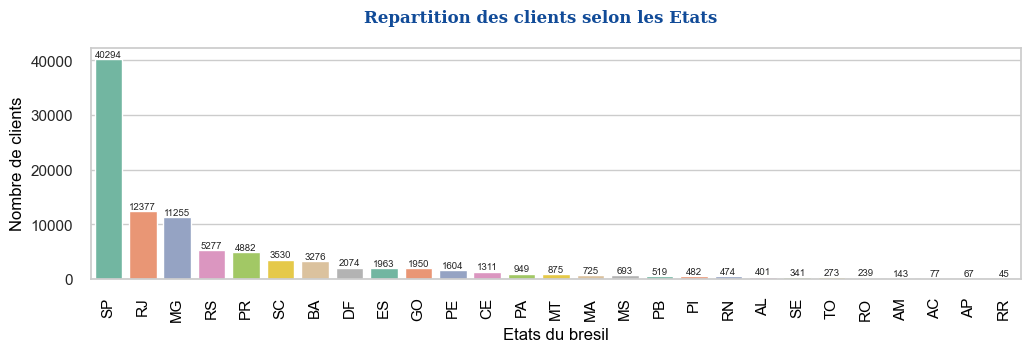

In [27]:
barplot2(df_customers, 'customer_state', 'customer_unique_id', agg_func='nunique',
         title="Repartition des clients selon les Etats" "\n",
         xtitle='Etats du bresil', ytitle='Nombre de clients',
         figsize=(12,3), labelsize=7, rotation=90, graphName = '',
         style='fast', palette ='Set2')

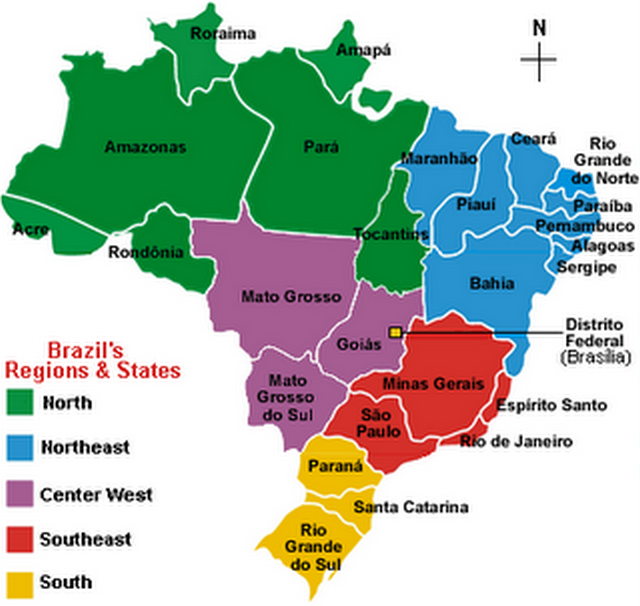

In [28]:
# <img src="shemadata.png"/>
# from IPython import display
# display.Image("shemadata.png")
# display.Image("https://i.imgur.com/HRhd2Y0.png")
from IPython import display
display.Image("carte_grandes_regions_bresil.png")

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Avec ce graphique, nous constatons que nos disposons plutot des code des Etats. Les noms des Etats sont disponibles <a   href="https://fr.wikipedia.org/wiki/%C3%89tats_du_Br%C3%A9sil">[ici]</a>, sur wikipedia.
Nous créer un dictionnaire pour mapper ces codes Etats. Ensuite, nous allons regrouper les Etats selon les grandes regions du bresil.   
</p></span></div>

In [29]:
# https://fr.wikipedia.org/wiki/%C3%89tats_du_Br%C3%A9sil
state_dict={'AC': 'Acre', 'AL':'Alagoas', 'AP': 'Amapá', 'AM':'Amazonas', 'BA':'Bahia', 'CE':'Ceará','ES':'Espírito Santo',
            'GO': 'Goiás', 'MA':'Maranhão', 'MT': 'Mato Grosso', 'MS':'Mato Grosso do Sul', 'MG': 'Minas Gerais', 
            'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE':'Pernambouc',  'PI':'Piauí', 'RJ':'Rio de Janeiro',
            'RN': 'Rio Grande do Norte', 'RS':'Rio Grande do Sul', 'RO':'Rondônia', 'RR': 'Roraima',
            'SC': 'Santa Catarina', 'SP': 'São Paulo', 'SE':'Sergipe', 'TO':'Tocantins', 'DF': 'District fédéral'
          }
df_customers['customer_state_name']=df_customers['customer_state'].map(state_dict)

regions_dict = {
        "North" : set(['AC', 'AM', 'RR', 'RO', 'PA', 'AP', 'TO']),
        "Northeast" : set(['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']),
        "Central" : set(['MT', 'GO', 'MS', 'DF']),
        "Southeast" : set(['MG', 'SP', 'ES', 'RJ']),
        "South" : set(['PR', 'SC', 'RS']),}

def add_region(state):
    for region, states in regions_dict.items():
        if state in states:
            return region

df_customers['customer_region'] = df_customers['customer_state'].map(add_region)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,São Paulo,Southeast
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,São Paulo,Southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,São Paulo,Southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,São Paulo,Southeast


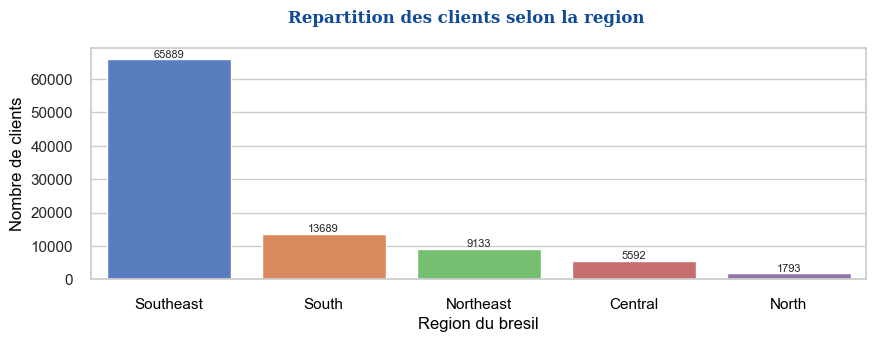

In [30]:
# vgraphCountPlot(df_customers, 'customer_region', figsize=(7, 3), rotation=30)

barplot2(df_customers, 'customer_region', 'customer_unique_id', agg_func='nunique',
         title="Repartition des clients selon la region" "\n",
         xtitle='Region du bresil', ytitle='Nombre de clients',
         figsize=(10,3), labelsize=8, rotation=0, graphName = '',
         style='fast', palette ='muted')

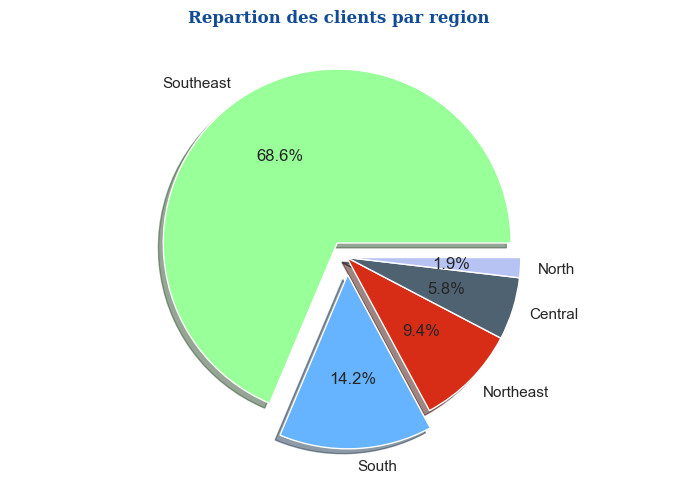

In [31]:
camembert(df_customers, 'customer_region', figsize=(7, 5),
         title='Repartion des clients par region \n')

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Les résultats de la repartition des clients par région montre que la <b>région du Nord-Est</b> est la mieux representée (<b>68.6%</b>). A contrario, la <b>region du Nord</b> est la moins representée (<b>2%</b>).
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.2. Les données geolocatisation (df_geolocation) <a id="3.2"></a></font>
--------------------------------------------------

Les variables de la base df_geolocation sont listées ci dessous :

> **geolocation_zip_code_prefix**: Les 5 premiers caractères du Zip code.   
> **geolocation_lat**: Lattitude   
> **geolocation_lng**: Longitude   
> **geolocation_city**: Nom de la ville  
> **geolocation_state**: Etat de residence

Cette base de données contient des informations sur les codes postaux brésiliens et ses coordonnées lat/lng.

In [32]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
apercu([df_geolocation],['df_geolocation'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,


In [34]:
doublons(df_geolocation,'geolocation_zip_code_prefix').sort_values(by=['geolocation_zip_code_prefix'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
864,1001,-23.549825,-46.633970,sao paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
596,1001,-23.550498,-46.634338,sao paulo,SP
1246,1001,-23.549292,-46.633559,sao paulo,SP
1062,1001,-23.550498,-46.634338,sao paulo,SP
...,...,...,...,...,...
999950,99980,-28.388400,-51.845225,david canabarro,RS
999897,99980,-28.386408,-51.844876,david canabarro,RS
999924,99980,-28.387693,-51.843881,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [35]:
df_geolocation=dedoublonner(df_geolocation)

# Caculer la moyenne des longitudes et lattitudes (grouper par zip_code_prefix)
# df_geolocation['geolocation_lat_means'] = df_geolocation\
#                 .groupby(by='geolocation_zip_code_prefix')['geolocation_lat']\
#                 .transform('mean')
# df_geolocation['geolocation_lng_means'] = df_geolocation\
#                 .groupby(by='geolocation_zip_code_prefix')['geolocation_lng']\
#                 .transform('mean')

df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [36]:
# Controle sur les Coordonnées geographiques. Nous allons vérifier et identifier les eventuelles coordonnées 
# qui sont en dehors du territoire bresilien.
geo=df_geolocation
# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo1 = geo[geo.geolocation_lat <= 5.27438888]
# it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo2 = geo[geo.geolocation_lng >= -73.98283055]
# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo3 = geo[geo.geolocation_lat >= -33.75116944]
# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo4 = geo[geo.geolocation_lng <=  -34.79314722]


<Axes: >

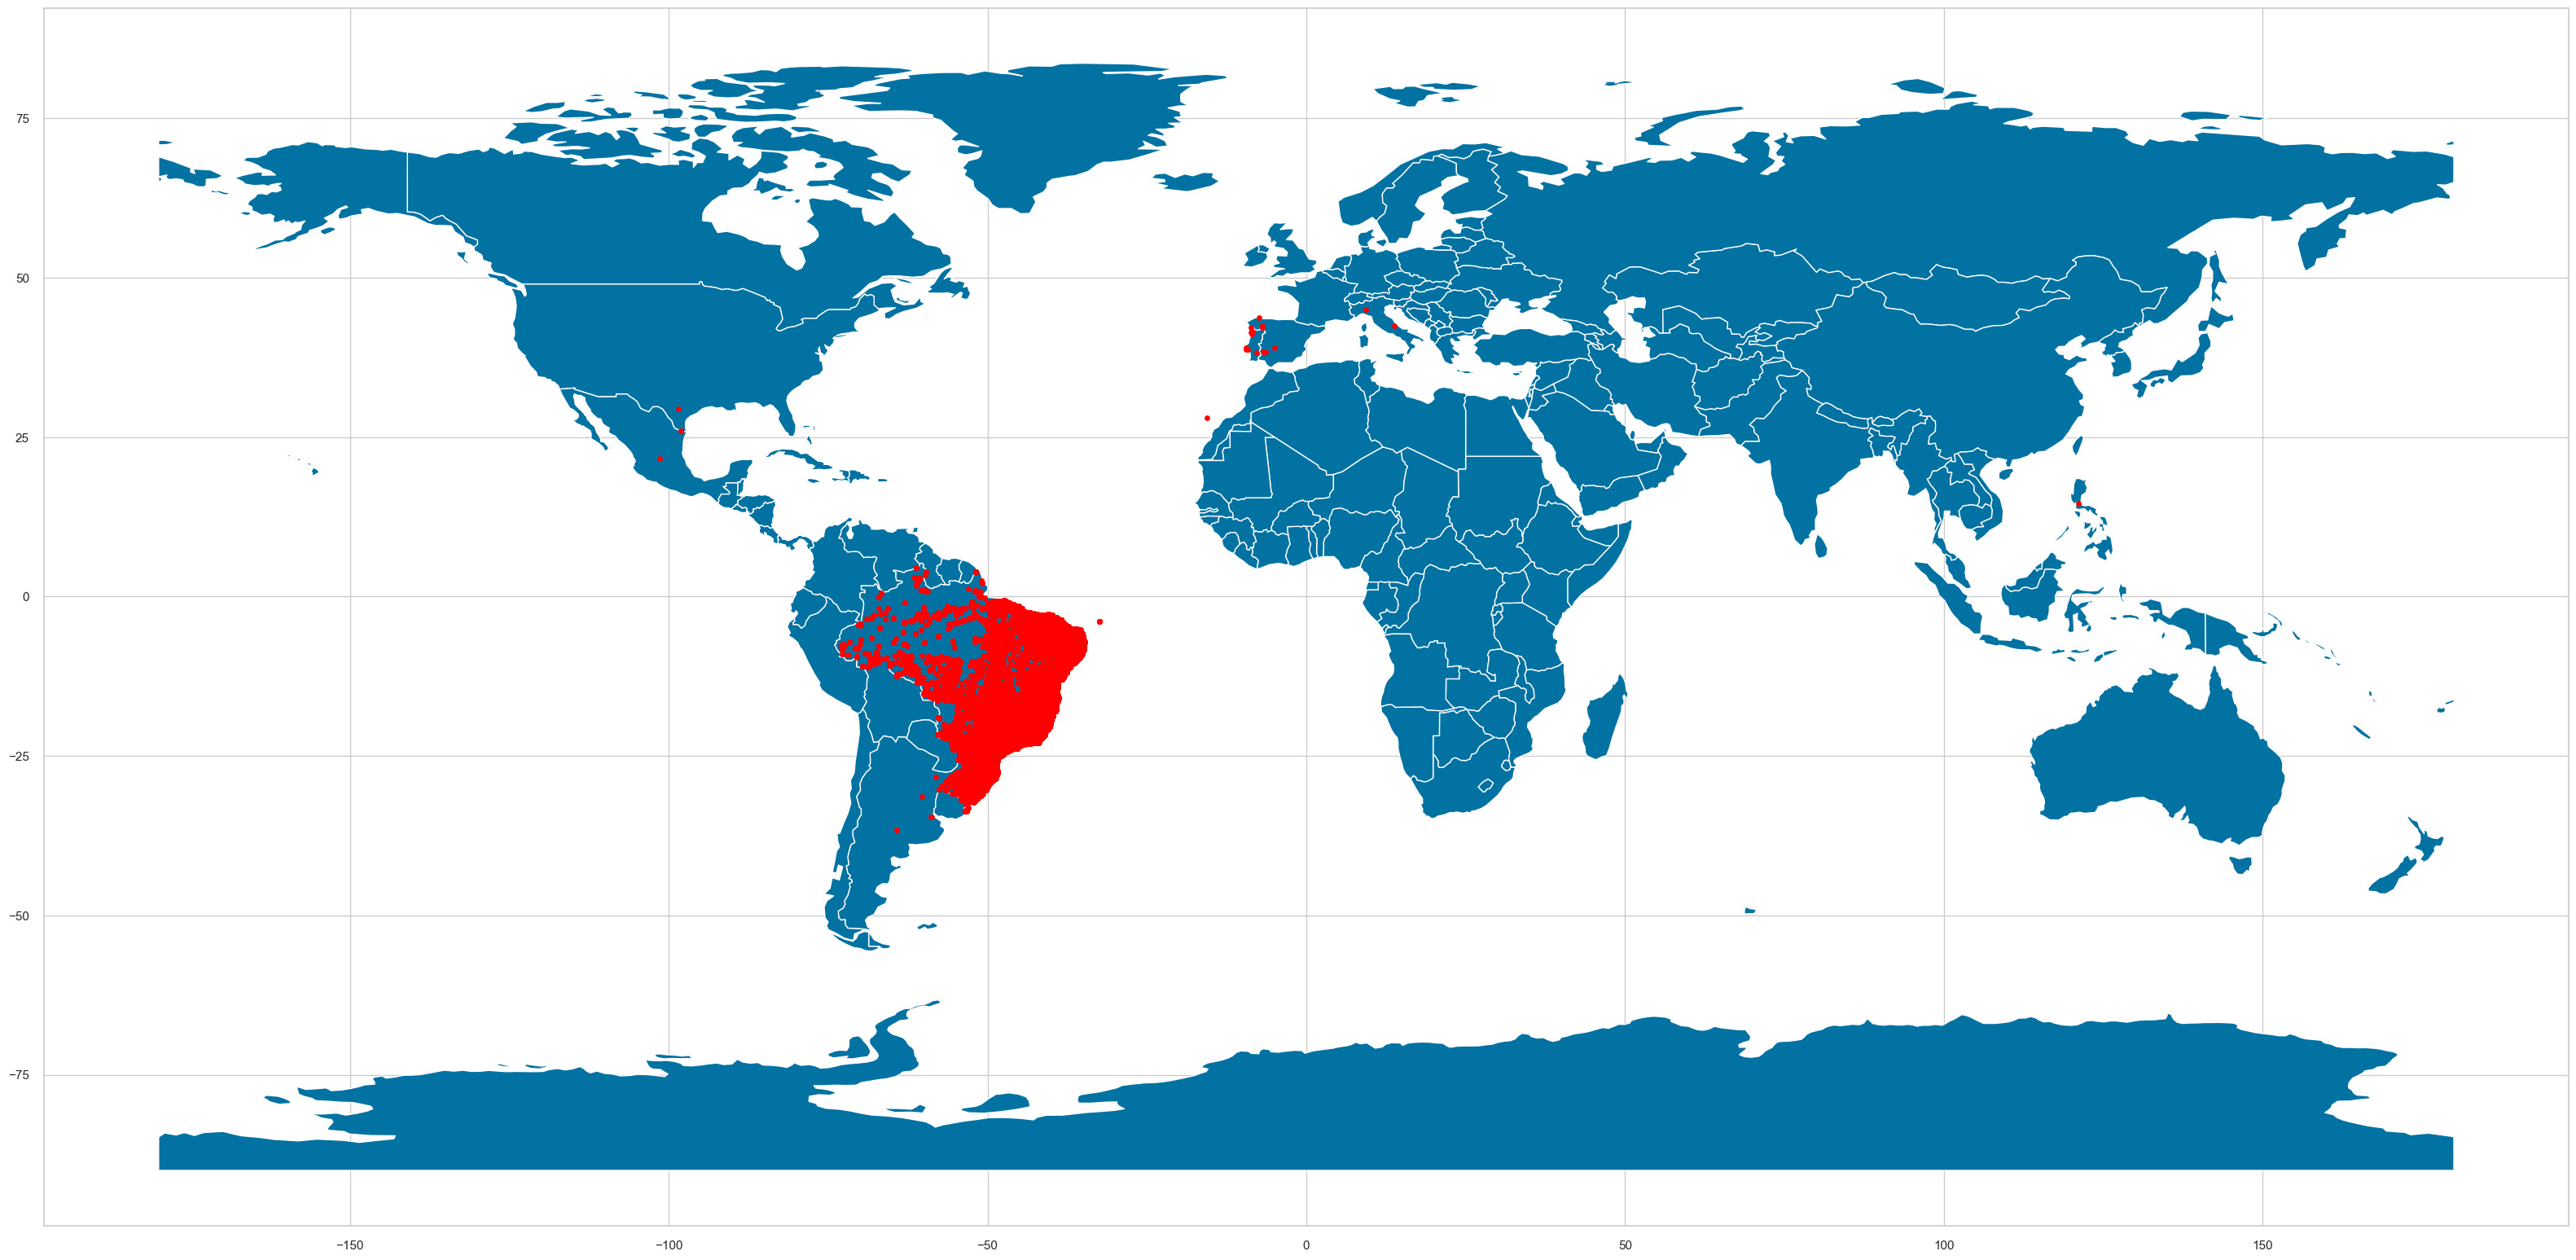

In [37]:
df_geolocation2=df_geolocation
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_geolocation2['geolocation_lng'],
                                    df_geolocation2['geolocation_lat'])]
gdf = GeoDataFrame(df_geolocation2, geometry=geometry)

# this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(40, 30)), marker='o',
         color='red', markersize=15)
# 'BR': ('Brazil', (-73.9872354804, -33.7683777809, -34.7299934555, 5.24448639569)),



<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; padding-right:10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
- Le fichier compte plus d'un million de lignes et pas de valeurs nulles. Le fichier a été dedoublonner car il presentait des valeurs doubles. <br>    
    - Par ailleurs, la majorité des clients se trouvent au Bresil. Cependant, quelques clients se trouvent en Europe et en Amérique du Nord.<br>     
    - Ce fichier est lié au fichier clients grâce à la clé <b>geolocation_zip_code_prefix</b>.
</p></span></div>

In [38]:
df_geolocation.geolocation_city.unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [39]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   geolocation_zip_code_prefix  738332 non-null  int64   
 1   geolocation_lat              738332 non-null  float64 
 2   geolocation_lng              738332 non-null  float64 
 3   geolocation_city             738332 non-null  object  
 4   geolocation_state            738332 non-null  object  
 5   geometry                     738332 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 39.4+ MB


In [40]:
# import unicodedata
# def remove_accents(string):
#     return ''.join(char for char in unicodedata.normalize('NFD', string)
#                    if unicodedata.category(char) != 'Mn')

df_geolocation['geolocation_city']=df_geolocation['geolocation_city'].apply(lambda x:remove_accents(x))

In [41]:
df_geolocation.geolocation_city.unique()

array(['sao paulo', 'sao bernardo do campo', 'jundiai', ...,
       'floriano peixoto', 'erebango', 'santa cecilia do sul'],
      dtype=object)

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Certains noms de villes étaient orthographiés différemment, avec accent et sans accent. Nous avons tout simplement supprimé tous les accents afin d'avoir des noms uniques. 
</p></span></div>

In [42]:
# dfolist=pd.merge(df_customers,df_geolocation, right_on='geolocation_zip_code_prefix',
#                  left_on='customer_zip_code_prefix', how='left')

In [43]:
def differenceKeys(data1,key1,data2,key2):
    print('-Les keys presents dans les deux dataframes *{0}* & *{1}*:'.format(namestr(data1,globals())[0],
                                                                             namestr(data2,globals())[0]), 
          len(list(set(data1[key1].unique().tolist()) & set(data2[key2].unique().tolist()))))
    print("-Les keys presents uniquement dans *{}* :".format(namestr(data1,globals())[0]), 
          len(list(set(data1[key1].unique().tolist()) - set(data2[key2].unique().tolist()))))
    print("-Les keys presents uniquement dans *{}* :".format(namestr(data2,globals())[0]), 
          len(list(set(data2[key2].unique().tolist()) - set(data1[key1].unique().tolist()))))
    df0=data1.loc[data1[key1].isin(list(set(data1[key1].unique().tolist()) & set(data2[key2].unique().tolist()))),:]
    df1=data1.loc[data1[key1].isin(list(set(data1[key1].unique().tolist()) - set(data2[key2].unique().tolist()))),:]
    df2=data2.loc[data2[key2].isin(list(set(data2[key2].unique().tolist()) - set(data1[key1].unique().tolist()))),:]
    return print(),df0, df1, df2

In [44]:
differenceKeys(df_customers,'customer_zip_code_prefix',df_geolocation, 'geolocation_zip_code_prefix')[0]

-Les keys presents dans les deux dataframes *df_customers* & *df_geolocation*: 14830
-Les keys presents uniquement dans *df_customers* : 157
-Les keys presents uniquement dans *df_geolocation* : 4185



In [45]:
def filterKeys(data1,key1,data2,key2):
    return data1.loc[data1[key1].isin(list(set(data2[key2].unique().tolist()))),:]

In [46]:
df_geolocation=filterKeys(df_geolocation, 'geolocation_zip_code_prefix', df_customers,'customer_zip_code_prefix')

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Nous avons detecter des zip codes dans le fichier geolocalisation mais qui n'existent pas dans le fichier customers.
    Nous les avons supprimés de la base geolocalisation. 
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.3. Les commandes (df_orders) <a id="3.3"></a></font>
--------------------------------------------------


Les variables de la base: 
> ***order_id***: unique identifier of the order     
> ***customer_id***: key to the customer dataset. Each order has a unique customer_id   
> ***order_status***: Reference to the order status (delivered, shipped, etc).    
> ***order_purchase_timestamp*** : Shows the purchase timestamp  
> ***order_approved_at*** : Shows the payment approval timestamp       
> ***order_delivered_carrier_date*** : Shows the order posting timestamp. When it was handled to the logistic partner.    
> ***order_delivered_customer_date*** : Shows the actual order delivery date to the customer.       
> ***order_estimated_delivery_date*** : Shows the estimated delivery date that was informed to customer at the purchase moment     

In [47]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
apercu([df_orders],['df_orders'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"


In [49]:
dfmiss=valeursManquantes(df_orders, axis=0)
dfmiss.loc[dfmiss['Missings']>0,:]

,Missings,Pourcentage,type variable
order_delivered_customer_date,2965,2.982,object
order_delivered_carrier_date,1783,1.793,object
order_approved_at,160,0.161,object


In [50]:
# def obsWithMissings(data):
#     mask = data.isnull().any(axis=1) 
#     df_masked = data[mask]
#     return df_masked

In [51]:
obsWithMissings(df_orders).head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [52]:
doublons(df_orders,'order_id')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [53]:
dates_fetaures=['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
                'order_delivered_customer_date','order_estimated_delivery_date']

convert_to_date(df_orders, dates_fetaures)
# df_orders.dtypes

----
Nous avons convertit les variables dates en format dates. Ainsi, nous pouvons calculer les écarts entre dates et autres comapraisons.

Nous allons alors vérifier s'il y a des inconhérences dans les dates du fichier commandes. 

In [54]:
df_orders.loc[df_orders['order_purchase_timestamp']>df_orders['order_approved_at'],:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [55]:
df_orders.loc[df_orders['order_purchase_timestamp']>df_orders['order_delivered_customer_date'],:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [56]:
df_orders.loc[df_orders['order_approved_at']>df_orders['order_delivered_customer_date'],:].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06
1986,6e57e23ecac1ae881286657694444267,2dda54e25d0984e12705c84d4030e6e0,delivered,2018-08-09 17:36:47,2018-08-20 15:55:42,2018-08-14 13:26:00,2018-08-17 16:45:45,2018-09-06
3659,f222c56f035b47dfa1e069a88235d730,b74ca180d63f9ae0443e4e13a2f5bdaf,delivered,2018-01-30 09:43:45,2018-02-04 23:31:47,2018-01-31 19:48:44,2018-02-01 20:10:38,2018-02-15
11738,cf72398d0690f841271b695bbfda82d2,2b7fff075bda701552485ef3f0810257,delivered,2017-09-01 18:45:33,2017-09-13 22:04:39,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21


In [57]:
freqSimple2(obsWithMissings(df_orders),['order_status'])

------------------------------------

#### Fréquence sur la variable ***order_status***

------------------------------------

,order_status,Nombre,Frequence,Freq. cumul
0,shipped,1107,0.371477,0.371477
1,canceled,619,0.207718,0.579195
2,unavailable,609,0.204362,0.783557
3,invoiced,314,0.105369,0.888926
4,processing,301,0.101007,0.989933
5,delivered,23,0.007718,0.997651
6,created,5,0.001678,0.999329
7,approved,2,0.000671,1.000000


Les valeurs manquantes portent sur les ***commandes non livrées***.   

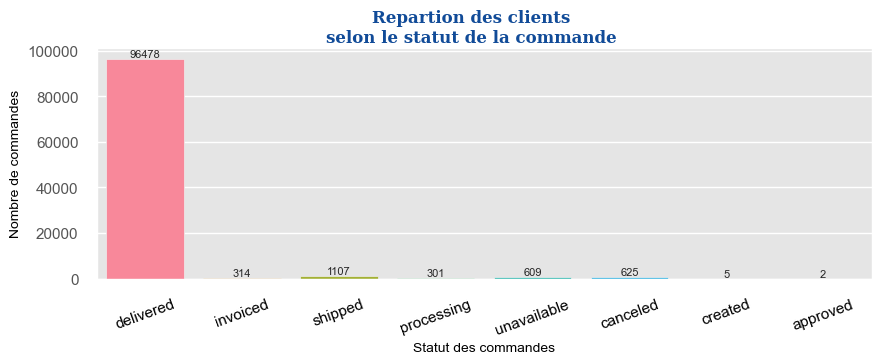

In [58]:
countplot2(df_orders, 'order_status', graphName ='CustomersByOrdersStatus.png', style='ggplot',
           title = r'Repartion des clients' '\n' 'selon le statut de la commande',
           xtitle = r"Statut des commandes",
           ytitle = r"Nombre de commandes",
           labelsize = 8, rotation = 20, figsize = (10,3))

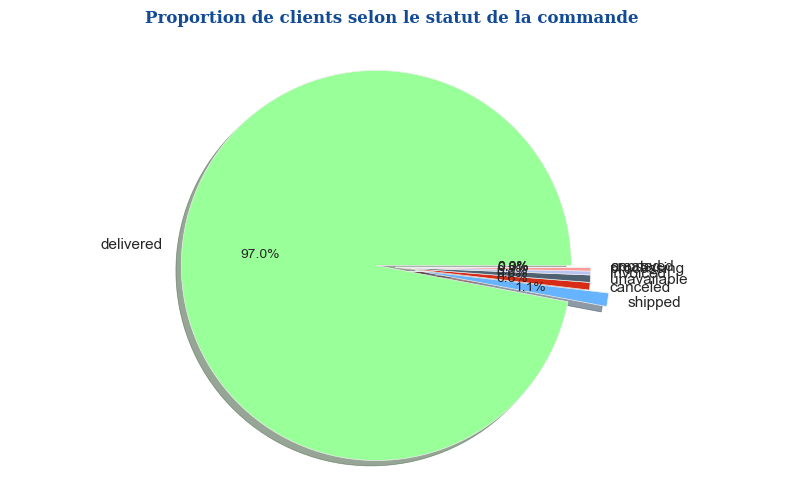

In [59]:
camembert(df_orders, 'order_status', figsize=(8, 5),
         title='Proportion de clients selon le statut de la commande \n', 
          graphName ='CustomersByOrdersStatus2.png')

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Ces graphiques montrent que les commandes livrées representent <b>97%</b> des commandes totales.
    plus tard dans les analyses, nous pouvons restreindre nos données aux commandes livrées..
</p></span></div>

#### <font color='#337da4' font-size='90%' text-align='left'> Imputation des valeurs manquantes (sur les dates) </font>

In [60]:
df_orders.loc[(pd.isnull(df_orders.order_delivered_customer_date)), 
              'order_delivered_customer_date'] = df_orders['order_estimated_delivery_date']
df_orders.loc[(pd.isnull(df_orders.order_approved_at)), 
              'order_approved_at'] = df_orders['order_purchase_timestamp']

df_orders.loc[(pd.isnull(df_orders.order_delivered_carrier_date)), 
              'order_delivered_carrier_date'] = df_orders['order_approved_at']


In [61]:
differenceKeys(df_customers,'customer_id', df_orders, 'customer_id')[0]

-Les keys presents dans les deux dataframes *df_customers* & *df_orders*: 99441
-Les keys presents uniquement dans *df_customers* : 0
-Les keys presents uniquement dans *df_orders* : 0





<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Les valeurs manquantes des dates ont été imputées. <br>    
Les commandes sont identifiées par un <b><i>order_id unique</i></b> et rattaché au client par le <b><i>customer_id</i></b>.
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.4. Les articles (df_order_items) <a id="3.4"></a></font>
--------------------------------------------------

> ***order_id*** : Identifiant unique de la commande; <br>
> ***order_item_id*** : Identifiant séquentiel des items d'une même commande (lignes de commande); <br>
> ***product_id*** : Identifiant unique du produit; <br>
> ***seller_id*** : Identifiant unique du vendeur; <br>
> ***price*** : Prix de la ligne de commande; <br>
> ***freight_value*** : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes).

In [62]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
apercu([df_order_items],['df_order_items'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,


In [64]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [65]:
dict_agg = {"order_id": "nunique",
            "product_id": "nunique",
            'order_item_id': 'max',
            'shipping_limit_date' : 'max',
            # 'days_since_last_order' : 'min',
            'seller_id' : "nunique",
            # 'prefered_payment' : lambda x: x.mode()[0],
            'freight_value' : 'sum',
            # 'most_frequent_number_of_payments': 'max',
            # 'payment_value': 'sum',
            'price' : 'sum',
            # 'review_score' : 'mean',
            # "product_category_name" : "nunique"            
            }
dfcheck = df_order_items.groupby("order_id").agg(dict_agg)
dfcheck.head()

,order_id,product_id,order_item_id,shipping_limit_date,seller_id,freight_value,price
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,2017-09-19 09:45:35,1,13.29,58.90
00018f77f2f0320c557190d7a144bdd3,1,1,1,2017-05-03 11:05:13,1,19.93,239.90
000229ec398224ef6ca0657da4fc703e,1,1,1,2018-01-18 14:48:30,1,17.87,199.00
00024acbcdf0a6daa1e931b038114c75,1,1,1,2018-08-15 10:10:18,1,12.79,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,2017-02-13 13:57:51,1,18.14,199.90


In [66]:
dfcheck.loc[dfcheck.product_id>1,:].head()

,order_id,product_id,order_item_id,shipping_limit_date,seller_id,freight_value,price
order_id,,,,,,,
002f98c0f7efd42638ed6100ca699b42,1,2,2,2017-08-10 09:30:15,2,39.73,53.89
00337fe25a3780b3424d9ad7c5a4b35e,1,2,2,2017-09-29 17:50:16,1,19.88,119.80
005d9a5423d47281ac463a968b3936fb,1,2,3,2017-10-24 12:28:16,1,45.28,99.97
00946f674d880be1f188abc10ad7cf46,1,2,2,2017-12-14 19:30:37,1,32.92,199.80
0097f0545a302aafa32782f1734ff71c,1,2,2,2018-03-09 18:30:41,1,41.84,466.00


In [67]:
differenceKeys(df_orders,'order_id', df_order_items, 'order_id')[2]['order_status'].unique()

-Les keys presents dans les deux dataframes *df_orders* & *df_order_items*: 98666
-Les keys presents uniquement dans *df_orders* : 775
-Les keys presents uniquement dans *df_order_items* : 0



array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Nous denombrons  (<b>775 order_id uniques</b>) qui n'existent pas dans le fichier <b>Orders items</b>. <br>
    Il s'agit des commandes non disponibles, annulées, etc.  <br>
    Nous allons <b>supprimer ces lignes de la table df_orders</b>.
</p></span></div>

In [68]:
df_order_items=filterKeys(df_order_items, 'order_id', df_orders,'order_id')


<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Ce fichier est rattaché au fichier commandes à travers le <b>order_id</b>.
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.5. Les paiements (df_order_payments) <a id="3.5"></a></font>

--------------------------------------------------

* ***payment_value*** : montant du paiement;
* ***payment_sequential*** : Si plusieurs méthodes de paiement appliquées, une ligne est crée par moyen utilisé;
* ***payment_type*** : le moyen utilisé pour le paiement;
* ***payment_installments*** : Nombre de versements choisis

In [69]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [70]:
apercu([df_order_payments],['df_order_payments'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,


In [71]:
# df_orders['order_id']=df_orders['order_id'].apply(lambda x: x.lower())
# df_order_payments['order_id']=df_order_payments['order_id'].apply(lambda x: x.lower())

differenceKeys(df_orders,'order_id', df_order_payments, 'order_id')[0]

-Les keys presents dans les deux dataframes *df_orders* & *df_order_payments*: 99440
-Les keys presents uniquement dans *df_orders* : 1
-Les keys presents uniquement dans *df_order_payments* : 0



In [72]:
df_order_payments=filterKeys(df_order_payments, 'order_id',df_orders,'order_id')
df_orders=filterKeys(df_orders,'order_id', df_order_payments, 'order_id')

In [73]:
doublons(df_order_payments,'order_id').sort_values(by=['order_id']).head(8)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17


In [74]:
df_order_payments.loc[df_order_payments['order_id']=='009ac365164f8e06f59d18a08045f6c4',:]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


In [75]:
dfcheck2=df_order_payments.groupby('order_id')['payment_value'].agg(np.sum).reset_index()
dfcheck2.isna().sum()

order_id         0
payment_value    0
dtype: int64

In [76]:
dict_agg = {'freight_value' : 'sum',
            'price' : 'sum'          
            }
dfcheck1 = df_order_items.groupby("order_id").agg(dict_agg).reset_index()
column_names = ['freight_value', 'price']
dfcheck1['Total']= dfcheck1[column_names].sum(axis=1)
dfcheck1.isna().sum()

order_id         0
freight_value    0
price            0
Total            0
dtype: int64

In [77]:
dfcheck=pd.merge(dfcheck1,dfcheck2, on='order_id', how='outer')
dfcheck

,order_id,freight_value,price,Total,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,58.90,72.19,72.19
1,00018f77f2f0320c557190d7a144bdd3,19.93,239.90,259.83,259.83
2,000229ec398224ef6ca0657da4fc703e,17.87,199.00,216.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.79,12.99,25.78,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,199.90,218.04,218.04
...,...,...,...,...,...
99436,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,NaN,29.59
99437,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,NaN,40.00
99438,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,NaN,173.68
99439,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,NaN,68.53


In [78]:
dfcheck.loc[dfcheck.payment_value.isna(),:]

,order_id,freight_value,price,Total,payment_value
73845,bfbd0f9bdef84302105ad712db648a6c,8.49,134.97,143.46,NaN


In [79]:
dfcheck.loc[dfcheck.Total.isna(),:]

,order_id,freight_value,price,Total,payment_value
98666,0010dedd556712d7bb69a19cb7bbd37a,NaN,NaN,NaN,111.12
98667,00a500bc03bc4ec968e574c2553bed4b,NaN,NaN,NaN,555.99
98668,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,NaN,0.00
98669,00bca4adac549020c1273714d04d0208,NaN,NaN,NaN,111.30
98670,00d0ffd14774da775ac832ba8520510f,NaN,NaN,NaN,134.49
...,...,...,...,...,...
99436,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,NaN,29.59
99437,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,NaN,40.00
99438,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,NaN,173.68
99439,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,NaN,68.53


In [80]:
order_to_drop=dfcheck.loc[dfcheck.Total.isna(),:]['order_id'].unique().tolist()
df_order_payments=df_order_payments.loc[~(df_order_payments.order_id.isin(order_to_drop)),:]

In [81]:
df_order_payments.loc[(df_order_payments["payment_installments"] == 0), :] 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [82]:
df_order_payments.loc[(df_order_payments["payment_installments"] == 0), "payment_installments"] = 1

In [83]:
df_order_payments.describe().round(2)

,payment_sequential,payment_installments,payment_value
count,103056.00,103056.00,103056.00
mean,1.09,2.86,153.76
std,0.70,2.69,216.07
min,1.00,1.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.77
max,29.00,24.00,13664.08


<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Ce fichier est rattaché au fichier commandes à travers le <b>order_id</b>.
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.6. Satisfaction clients (df_order_reviews) <a id="3.6"></a></font>
--------------------------------------------------

> ***review_id*** : unique review identifier   
> ***order_id***: unique order identifier   
> ***review_score*** : Note ranging from 1 to 5 given by the customer on a satisfaction survey.  
> ***review_comment_title*** : Comment title from the review left by the customer, in Portuguese.   
> ***review_comment_message*** : Comment message from the review left by the customer, in Portuguese.   
> ***review_creation_date*** : Shows the date in which the satisfaction survey was sent to the customer.   
> ***review_answer_timestamp*** : Shows satisfaction survey answer timestamp.   

In [84]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [85]:
apercu([df_order_reviews],['df_order_reviews'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_order_reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"


In [86]:
dfmiss=valeursManquantes(df_order_reviews, axis=0)
dfmiss.loc[dfmiss['Missings']>0,:]

,Missings,Pourcentage,type variable
review_comment_title,87656,88.342,object
review_comment_message,58247,58.703,object


In [87]:
obsWithMissings(df_order_reviews).head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [88]:
differenceKeys(df_orders,'order_id', df_order_reviews, 'order_id')[0]

-Les keys presents dans les deux dataframes *df_orders* & *df_order_reviews*: 98672
-Les keys presents uniquement dans *df_orders* : 768
-Les keys presents uniquement dans *df_order_reviews* : 1



In [89]:
df_order_reviews['review_comment_title'].fillna('No title', inplace=True)
df_order_reviews['review_comment_message'].fillna('No comment', inplace=True)

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
    Nous avons imputé les valeurs manquantes en mettant <b>No comment</b> et <b>No title </b>.<br> 
Ce fichier presente les rétours des clients liés suite à leurs commandes. <br>   
    Le client donne <b><i>une note</i></b> et laisse <b><i>un commentaire</i></b>.<br>
Ce fichier est rattaché au fichier commandes à travers le <b><i>order_id</i></b>.
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.7. Les produits (df_products) <a id="3.7"></a></font>
--------------------------------------------------

Cette base fournit des informations sur les produits vendus par Olist.

The product dataset contains information about the product (id, category, lenght of product name and description, number of photos and dimensions of the product). It can be liked to order_item by the product id.

> ***product_id*** : unique product identifier   
> ***product_category_name*** : root category of product, in Portuguese.   
> ***product_name_lenght*** : number of characters extracted from the product name.   
> ***product_description_lenght*** : number of characters extracted from the product description.   
> ***product_photos_qty*** : number of product published photos    
> ***product_weight_g*** : product weight measured in grams.    
> ***product_length_cm*** : product length measured in centimeters.   
> ***product_height_cm*** : product height measured in centimeters.   
> ***product_width_cm*** : product width measured in centimeters.    

In [90]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [91]:
apercu([df_products],['df_products'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"


In [92]:
dfmiss=valeursManquantes(df_products, axis=0)
dfmiss.loc[dfmiss['Missings']>0,:]

,Missings,Pourcentage,type variable
product_category_name,610,1.851,object
product_name_lenght,610,1.851,float64
product_description_lenght,610,1.851,float64
product_photos_qty,610,1.851,float64
product_weight_g,2,0.006,float64
product_length_cm,2,0.006,float64
product_height_cm,2,0.006,float64
product_width_cm,2,0.006,float64


In [93]:
obsWithMissings(df_products).head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [94]:
df_products.product_id.nunique()==df_products.shape[0]

True

In [95]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [96]:
df_products.shape

(32951, 9)

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Nous avons des valeurs manquantes sur les catégories de produits pour <b>610 produits</b>.<br>
Le poids et les dimensions sont aussi manquants pour <b>deux (02)produits</b>.
</p></span></div>

#### <font color='#337da4' text-align='left'> 3.8. Les vendeurs (df_sellers) <a id="3.8"></a></font>
--------------------------------------------------

The seller dataset contains information about the sellers (id, zip code, city and state). It can be liked to order_item by the seller id and with geolocalisation by zip code prefix.

> ***seller_id*** : seller unique identifier   
> ***seller_zip_code_prefix*** : first 5 digits of seller zip code   
> ***seller_city*** : seller city name   
> ***seller_state*** : seller state   

In [97]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [98]:
apercu([df_sellers],['df_sellers'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,


In [99]:
doublons(df_sellers,'seller_id')

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [100]:
df_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [101]:
(df_sellers.seller_id.nunique()==df_sellers.shape[0],df_sellers.seller_city.nunique(),
 df_sellers.seller_state.nunique())

(True, 611, 23)

-------
Dans ce projet, nous nous interessons à la ***segmentation des clients***, donc, aux ***informations relatives aux clients***.
De ce fait, nous allons ignorer la base vendeur. Elle ne sera pas utilisée dans nos analyses.


#### <font color='#337da4' text-align='left'> 3.9. Les catégories de produits (df_category_name) <a id="3.9"></a></font>
--------------------------------------------------

The product category table allows the conversion of product names into English.

> ***product_category_name*** : category name in Portugues   
> ***product_category_name_english*** : category name in English   

In [102]:
df_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [103]:
apercu([df_category_name],['df_category_name'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_category_name,"product_category_name, product_category_name_english",71,2,0,0,


In [104]:
df_category_name['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

--------
Nous avons beaucoup de catégories (**71**). Nous allons les regrouper en classes beaucoup plus homogènes pour faciliter les analyses.
POur ce faire, nous allons créer un dictionnaire.

In [183]:
map_categories = {
    #appliances : electroménager
    'home_appliances' :'appliances',
    'home_appliances_2' : 'appliances',
    'small_appliances_kitchen_and_food_processors' : 'appliances',
    'small_appliances_home_oven_and_coffee' : 'appliances',
    'small_appliances': 'appliances',
    'air_conditioning' : 'appliances',
    
    #tools : outils
    'garden_tools': 'tools',
    'costruction_tools_garden' : 'tools',
    'home_construction' : 'tools',
    'costruction_tools_tools' : 'tools',
    'construction_tools_lights' : 'tools',
    'construction_tools_construction' : 'tools', 
    'construction_tools_safety' : 'tools', 
    
    #electronique
    'electronics' : 'electronics',
    'computers_accessories': 'electronics',
    'telephony' : 'electronics',
    'consoles_games' : 'electronics',
    'computers' : 'electronics',
    'pc_gamer' : 'electronics',
    'fixed_telephony' : 'electronics',
    'tablets_printing_image' : 'electronics',
    
    #hygiene et beauté
    'health_beauty' : 'hygiene_and_beauty',
    'perfumery' : 'hygiene_and_beauty',
    'diapers_and_hygiene': 'hygiene_and_beauty', 
  
    #loisirs et auto
    'sports_leisure' : 'auto_leisure', 
    'toys': 'auto_leisure',
     'auto': 'auto_leisure',
    
    #fashion
    'watches_gifts' : 'fashion',  
    'fashion_bags_accessories' : 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing' : 'fashion',
    'fashio_female_clothing' : 'fashion',
    'fashion_childrens_clothes' : 'fashion',
    'fashion_underwear_beach' : 'fashion',
    'fashion_sport' : 'fashion',
    'baby' : 'fashion',
    'luggage_accessories' : 'fashion', 
     
    #mobilier
    'kitchen_dining_laundry_garden_furniture' : 'furniture',
    'furniture_living_room' : 'furniture', 
    'furniture_mattress_and_upholstery' : 'furniture',
    'office_furniture' : 'furniture',
    'furniture_bedroom' : 'furniture',
    
    #articles de décoration
    'furniture_decor': 'decoration' ,
    'christmas_supplies': 'decoration',
    'party_supplies': 'decoration',
    'bed_bath_table' : 'decoration',
   
    #articles ménagers
    'housewares': 'housewares',
    'home_confort' : 'housewares',
    'home_comfort_2' : 'housewares',
    'la_cuisine': 'housewares',
    'stationery': 'housewares',
       
    #jardin et extérieurs
    'pet_shop': 'garden_outdoors',
    'flowers': 'garden_outdoors', 
    'signaling_and_security' : 'garden_outdoors' ,
    #services
    'market_place' : 'services',   
    'industry_commerce_and_business' : 'services',
    'security_and_services' : 'services', 
    
    #culture 
    'arts_and_craftmanship' : 'culture',   
    'books_technical': 'culture',
    'books_general_interest': 'culture',
    'books_imported': 'culture',
    'musical_instruments' : 'culture',
    'cds_dvds_musicals' : 'culture',
    'dvds_blu_ray' : 'culture',
    'cine_photo' : 'culture',
    'audio' : 'culture',
    'music' : 'culture',
    'art' : 'culture', 
    
    #aliments et boissons
    'food': 'food_drinks',
    'food_drink' : 'food_drinks',
    'drinks': 'food_drinks',
    'agro_industry_and_commerce' : 'food_drinks',
}

In [184]:
df_category_name['product_category'] = df_category_name['product_category_name_english'].astype('object')
df_category_name['product_category'] = df_category_name ['product_category'].replace(map_categories, regex=False)
df_category_name['product_category'] = df_category_name ['product_category'].apply(lambda x: 'cat_'+x)
df_category_name['product_category'].unique()

array(['cat_hygiene_and_beauty', 'cat_electronics', 'cat_auto_leisure',
       'cat_decoration', 'cat_housewares', 'cat_fashion',
       'cat_food_drinks', 'cat_tools', 'cat_appliances', 'cat_culture',
       'cat_cool_stuff', 'cat_furniture', 'cat_garden_outdoors',
       'cat_services'], dtype=object)

In [185]:
df_category_name['product_category'].isnull().sum()

0

In [186]:
df_category_name['product_category'].nunique()

14

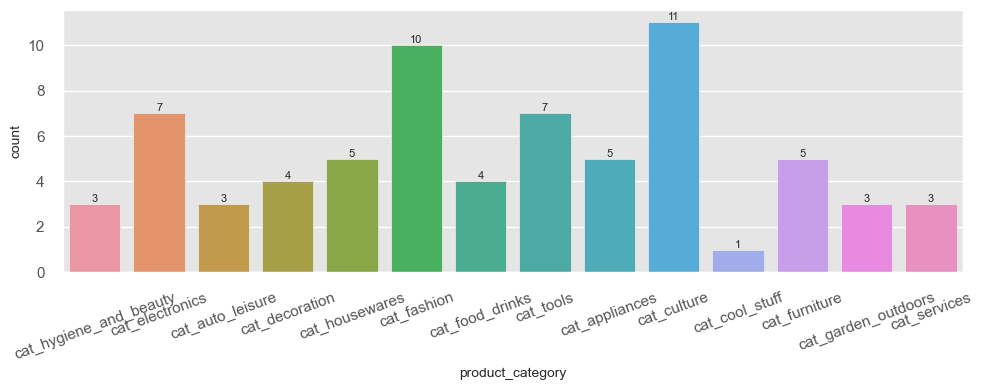

In [187]:
vgraphCountPlot(df_category_name, 'product_category', figsize=(10, 4), rotation=20, graphName='NewCatgoryGraph.png')

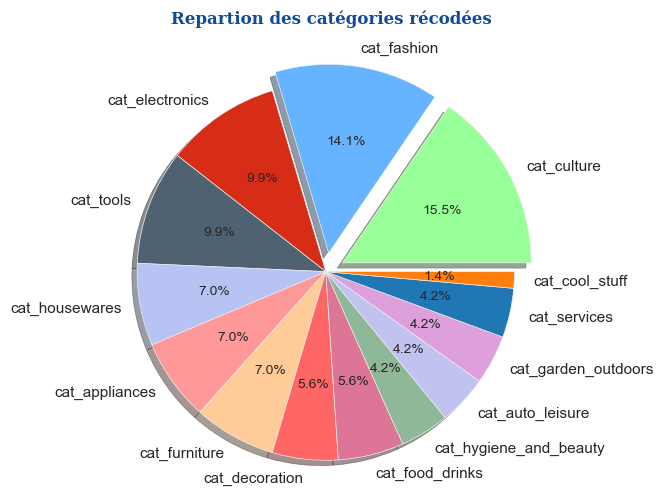

In [188]:
camembert(df_category_name, 'product_category', figsize=(7, 5),
         title='Repartion des catégories récodées \n', graphName='NewCatgoryGraph2.png')

-----
Les catégories et les produits sont liés par la variable ***product_category_name***.

### <font color="#337da4" id="4">4. Exploration </font>
----------------------------

Nous allons nous interesser aux clients, catégories de produits, aux commandes, etc. 

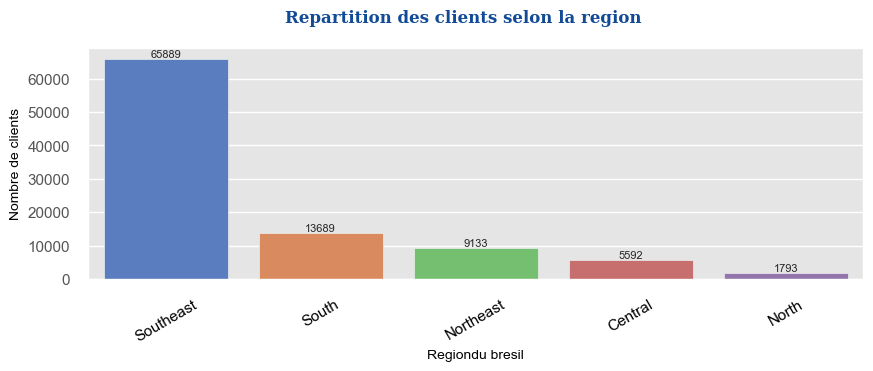

In [189]:
df_olist= pd.merge(df_customers, df_orders, on=["customer_id"],how="left")
df_olist= df_olist.merge(df_order_reviews, on=["order_id"],how="left")
df_olist= df_olist.merge(df_order_items, on=["order_id"],how="left")
df_olist= df_olist.merge(df_order_payments, on="order_id",how="left")
df_olist= df_olist.merge(df_products, on=["product_id"],how="left")
df_olist= df_olist.merge(df_category_name, on=["product_category_name"],how="left")


barplot2(df_customers, 'customer_region', 'customer_unique_id',
         agg_func='nunique',
         title="Repartition des clients selon la region" "\n",
         xtitle='Regiondu bresil', ytitle='Nombre de clients', 
         figsize=(10,3), labelsize=8, rotation=30, 
         graphName = 'customersbyregion.png', style='fast')

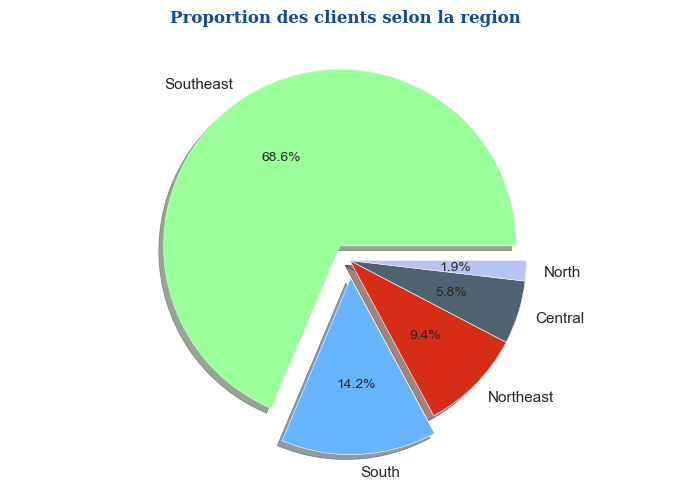

In [190]:
camembert(df_customers, 'customer_region', figsize=(7, 5), 
          title =r"Proportion des clients selon la region" "\n",graphName = 'customersbyregion2.png')

-----------
La repartition du nombre de clients par region revèle que la majorité des clients (***près des 2/3 des clients***) resident dans la region du ***Nord-Est***.
A contrario, la région du ***Nord*** est la moins habitée, ***à peine 2% des clients y resident***.

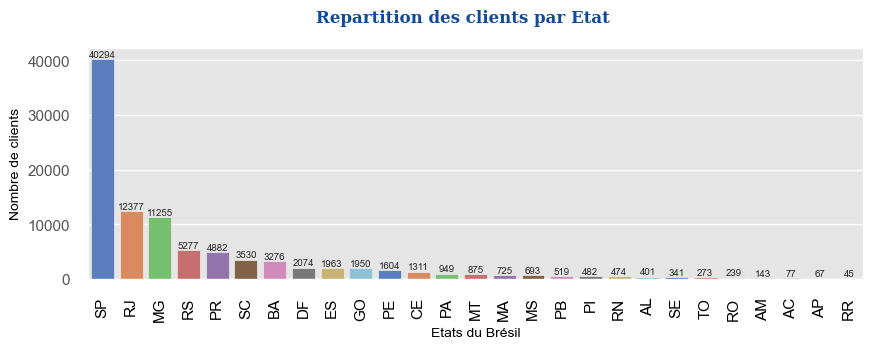

In [191]:
barplot2(df_customers, 'customer_state', 'customer_unique_id', agg_func='nunique',
         title=r"Repartition des clients par Etat" "\n",
         xtitle='Etats du Brésil', ytitle='Nombre de clients', 
         figsize=(10,3), labelsize=7, rotation=90, 
         graphName = 'customersbyState.png', style='fast')

-----------
Les résultats par Etat montrent que ***Sao polo*** s'adjuge le plus grand nombre de clients. Il est suivi par Rio de Janeiro.


In [192]:
# df_olist= pd.merge(df_customers, df_orders, on="customer_id",how="left")
# barplot2(df_olist, 'customer_unique_id', 'order_id', agg_func='nunique',
#          title=r"Nombre de commandes par client" "\n",
#          xtitle='Nombre de clients' , ytitle='Nombre de commandes', 
#          figsize=(10,3), labelsize=7, rotation=90, 
#          graphName = '', style='fast')

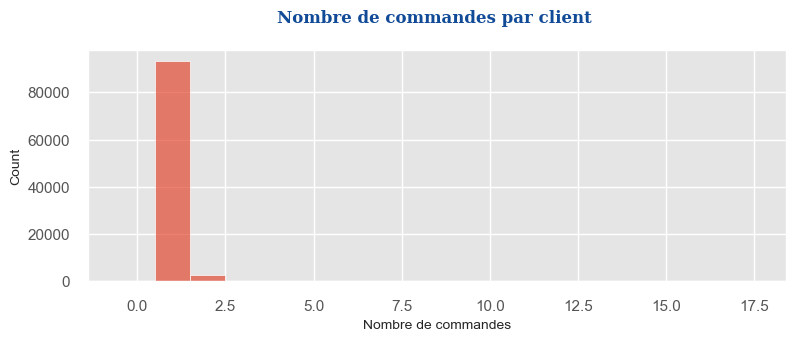

In [193]:
style='ggplot'
plt.style.use(style)
fig = plt.figure(figsize=(9, 3))
sns.histplot(df_olist.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id", discrete=True, edgecolor="white", alpha=0.7)
plt.xlabel("Nombre de commandes")
plt.title(f"Nombre de commandes par client \n", fontdict=font_title2)
plt.show()

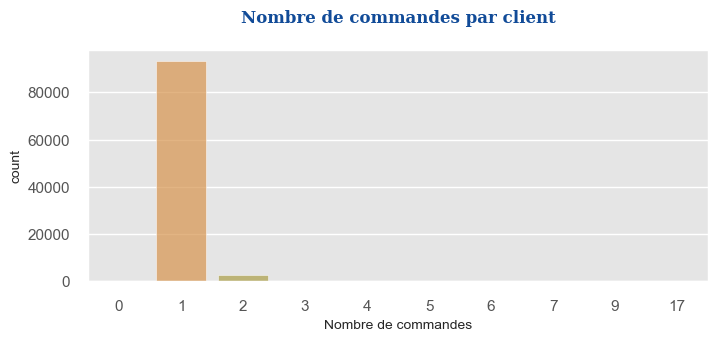

In [194]:
# df_olist= pd.merge(df_customers, df_orders, on="customer_id",how="left")

fig = plt.figure(figsize=(8, 3))
sns.countplot(df_olist.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",  edgecolor="white", alpha=0.7)
plt.xlabel("Nombre de commandes")
plt.title(f"Nombre de commandes par client\n",fontdict=font_title2)
plt.show()

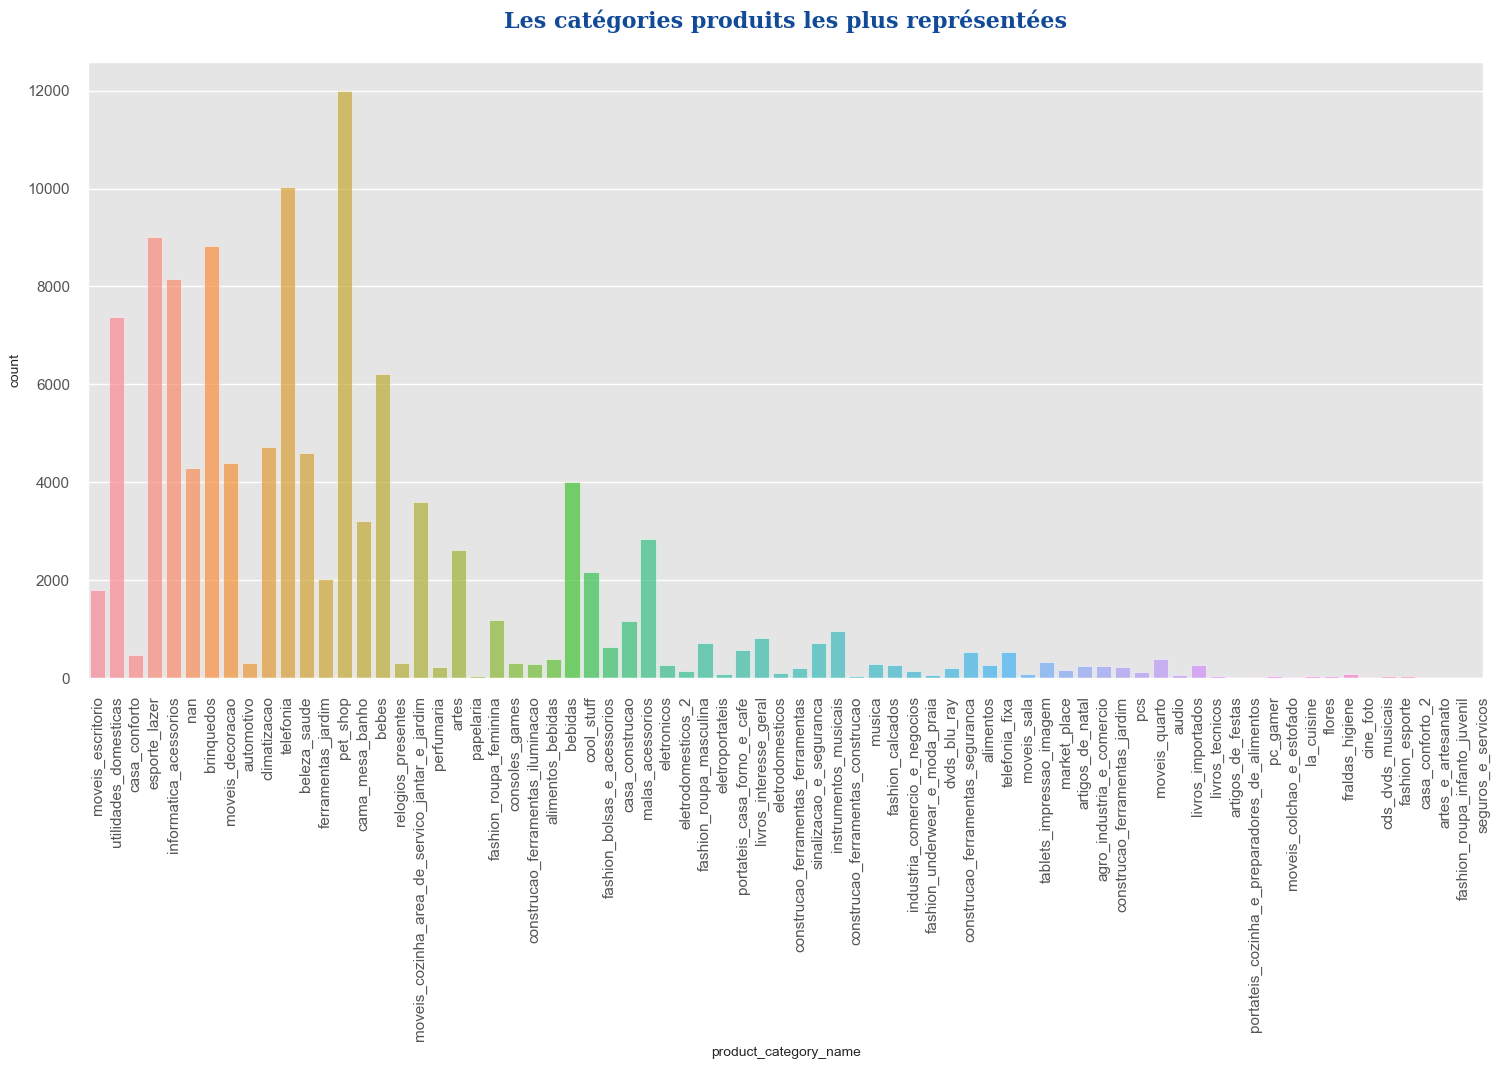

In [195]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df_olist, x="product_category_name",
              edgecolor="white", saturation=1, alpha=0.7) # color="#00d994",
plt.xticks(range(0, df_olist["product_category_name"].nunique()+1),
           df_olist["product_category_name"].unique(),
           rotation=90)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

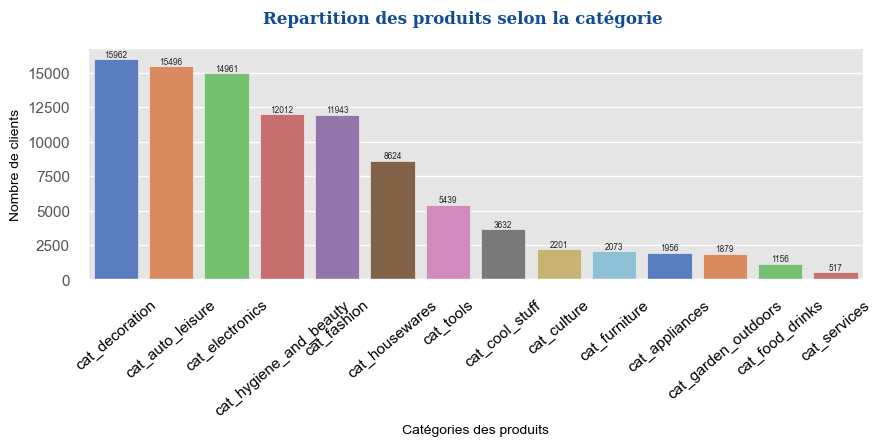

In [196]:
barplot2(df_olist, 'product_category', 'order_id',
         agg_func='nunique',
         title=r"Repartition des produits selon la catégorie" "\n",
         xtitle='Catégories des produits', ytitle='Nombre de clients', 
         figsize=(10,3), labelsize=6, rotation=40, 
         graphName = 'repartbycategory.png', style='fast')

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
En regardant les résultats selon la nouvelle catégorisation, nous notons que le  <b>Top 3</b> des produits les plus commandés sont ceux de <b> décoration, loisirs et électroniques</b>). Les produits <b>alimentaires et services</b>  sont les moins commandés.
</p></span></div>

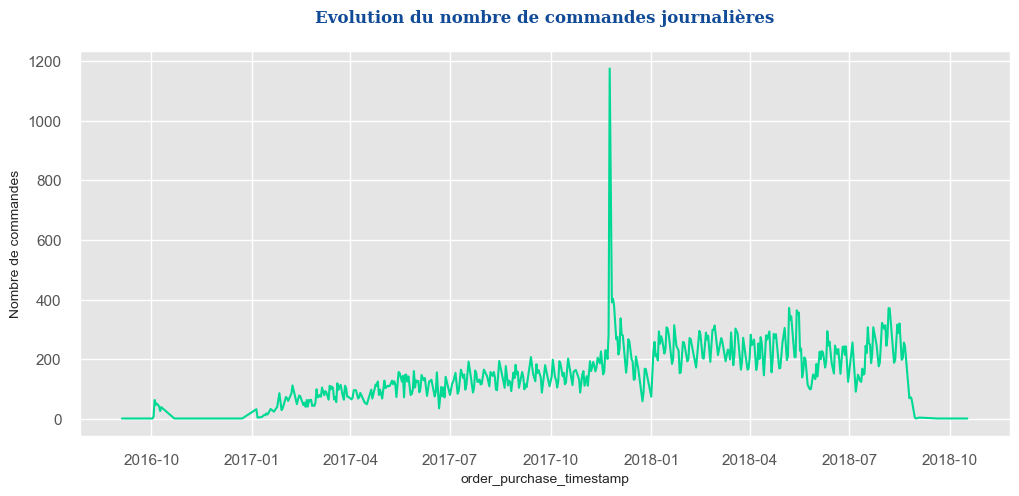

In [197]:
orders_per_days = df_orders.groupby(df_orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,5))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("Nombre de commandes")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title2)
plt.show()

-----------

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
On remarque un <b>pic anormal</b> autour de Novembre / Décembre 2017 (ce qui peut être un pic correspondant aux cadeaux de fin d'année, aux fêtes de fin d'année). Par ailleurs, nous allons enregistrons un plateau entre Octobre 2016 et Janvier 2017.
</p></span></div>

In [198]:

df_olist['mois_num']=df_olist['order_purchase_timestamp'].dt.month_name().str[:3]

df_olist['season']=df_olist['order_purchase_timestamp'].dt.quarter
season_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'automn'}
df_olist['season'] = df_olist['season'].replace(season_dict)

df_olist['week']=df_olist['order_purchase_timestamp'].dt.day_name().str[:3] # dayofweek
df_olist['hour']=df_olist['order_purchase_timestamp'].dt.hour

cat_day_of_week = pd.CategoricalDtype(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],ordered=True,)
cat_month = pd.CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'], 
                             ordered=True,)

df_olist['week'] = df_olist['week'].astype(cat_day_of_week)
df_olist['mois_num'] = df_olist['mois_num'].astype(cat_month)

df_olist[['order_purchase_timestamp','mois_num', 'season', 'week']]

,order_purchase_timestamp,mois_num,season,week
0,2017-05-16 15:05:35,May,spring,Tue
1,2018-01-12 20:48:24,Jan,winter,Fri
2,2018-05-19 16:07:45,May,spring,Sat
3,2018-03-13 16:06:38,Mar,winter,Tue
4,2018-07-29 09:51:30,Jul,summer,Sun
...,...,...,...,...
119081,2018-04-07 15:48:17,Apr,spring,Sat
119082,2018-04-04 08:20:22,Apr,spring,Wed
119083,2018-04-08 20:11:50,Apr,spring,Sun
119084,2017-11-03 21:08:33,Nov,automn,Fri


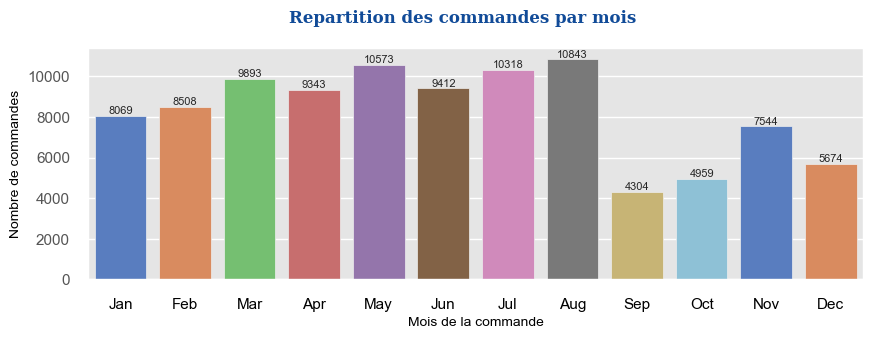

In [199]:
barplot2(df_olist, 'mois_num', 'order_id', agg_func='nunique',
         title="Repartition des commandes par mois" "\n",
         xtitle='Mois de la commande', ytitle='Nombre de commandes',
         figsize=(10,3), labelsize=8, rotation=0, graphName = 'customersbymonth.png',
         style='fast')

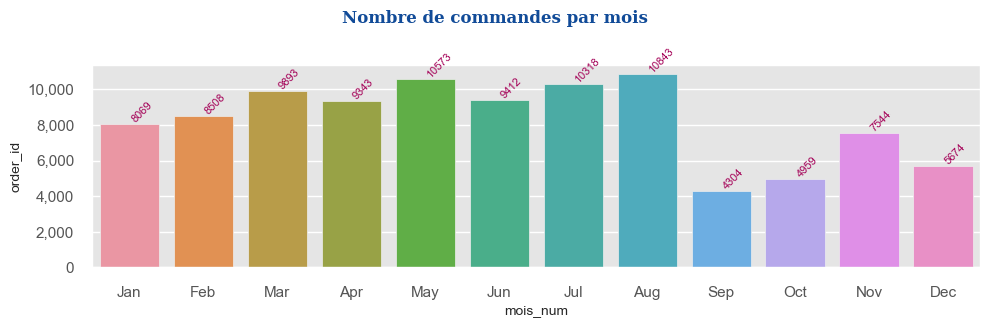

In [200]:
# cat_day_of_week = pd.CategoricalDtype(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],ordered=True)
# cat_month = pd.CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sept','Oct','Nov','Dec'], 
#                              ordered=True,)

# df_orders=df_orders.copy()
# df_orders['week'] = df_orders['week'].astype(cat_day_of_week)
# df_orders['mois_num'] = df_orders['mois_num'].astype(cat_month)

barplot3(df_olist,varX='mois_num',varY='order_id',agg_func='nunique',xrotation=0,labrotation=45,
             barlabsize=8,labcolor='m',figsize=(10,3), graphName = 'customersbymonth.png',
        title='Nombre de commandes par mois''\n\n')


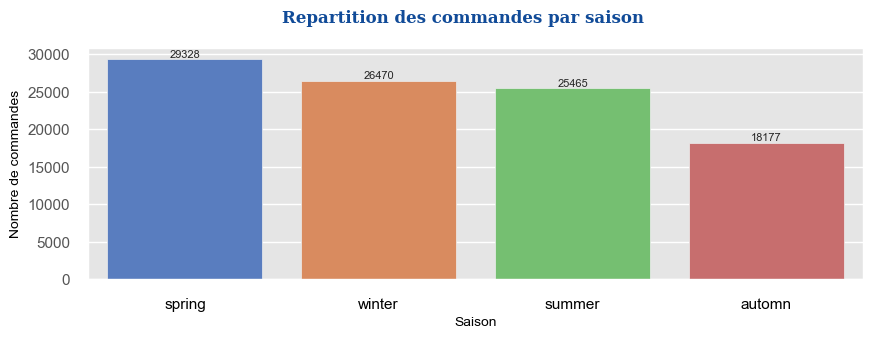

In [201]:
barplot2(df_olist, 'season', 'order_id', agg_func='nunique',
         title="Repartition des commandes par saison" "\n",
         xtitle='Saison', ytitle='Nombre de commandes',
         figsize=(10,3), labelsize=8, rotation=0, graphName = 'orderperseason.png',
         style='fast')

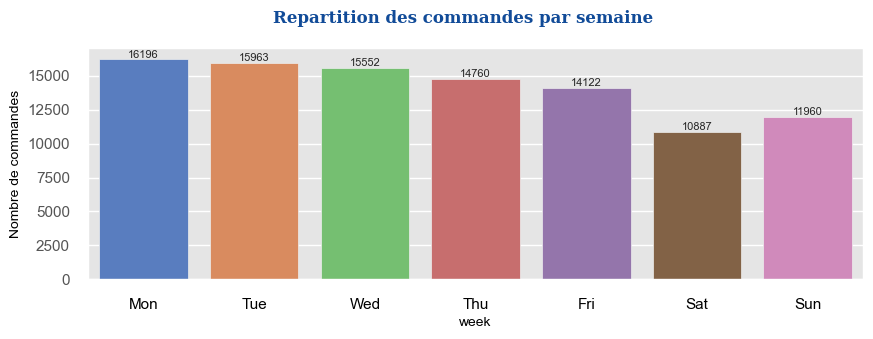

In [202]:
barplot2(df_olist, 'week', 'order_id', agg_func='nunique',
         title="Repartition des commandes par semaine" "\n",
         xtitle='week', ytitle='Nombre de commandes',
         figsize=(10,3), labelsize=8, rotation=0, graphName = 'orderperweek.png',
         style='fast')

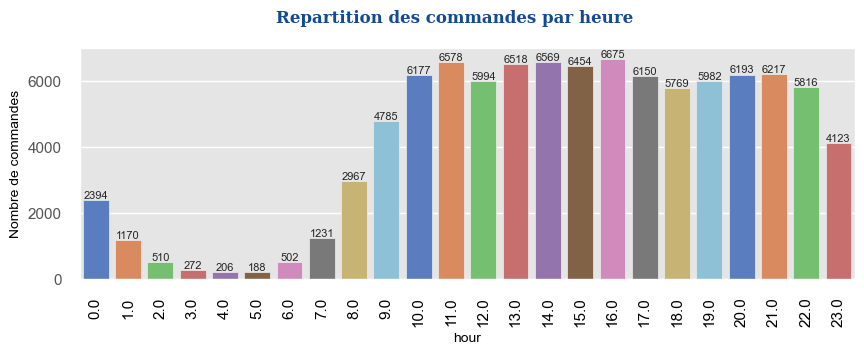

In [203]:
barplot2(df_olist, 'hour', 'order_id', agg_func='nunique',
         title="Repartition des commandes par heure" "\n",
         xtitle='hour', ytitle='Nombre de commandes',
         figsize=(10,3), labelsize=8, rotation=90, graphName = '',
         style='fast')

<div class="warning" style="color:#4F6272;font-size:100%;text-align:left; padding-left: 10px; border-top: solid gray 4px; border-bottom: solid gray 2px; border-radius: 10px 10px;"> <span> <p style='margin-left:0.6em;'>
Les résultats de la repartition des clients par région montre que la <b>région du Nord-Est</b> est la mieux representée (<b>68.6%</b>). A contrario, la <b>region du Nord</b> est la moins representée (<b>2% </b>).
</p></span></div>

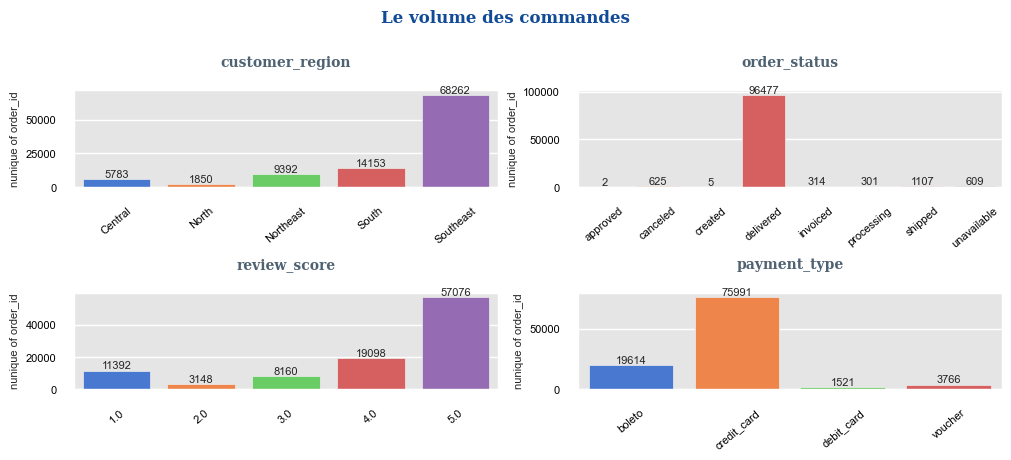

In [204]:
# muted, pastel, coolwarm,'Accent', 'cubehelix',
# 'gist_rainbow', 'terrain', 'viridis', vlag
listvar=['customer_region','order_status','review_score','payment_type']

g_multi_agg(df_olist, listvar, 'order_id', 'nunique',
            title = r"Le volume des commandes" "\n \n \n\n",
            ncols=2, figsize=(10, 5), labelsize=8, rotation=40, xlabsize=8, ylabsize=8, 
            palette='muted', saturation=1, graphName='volumeOrder.png',  shareyy= False, sharexx= False)

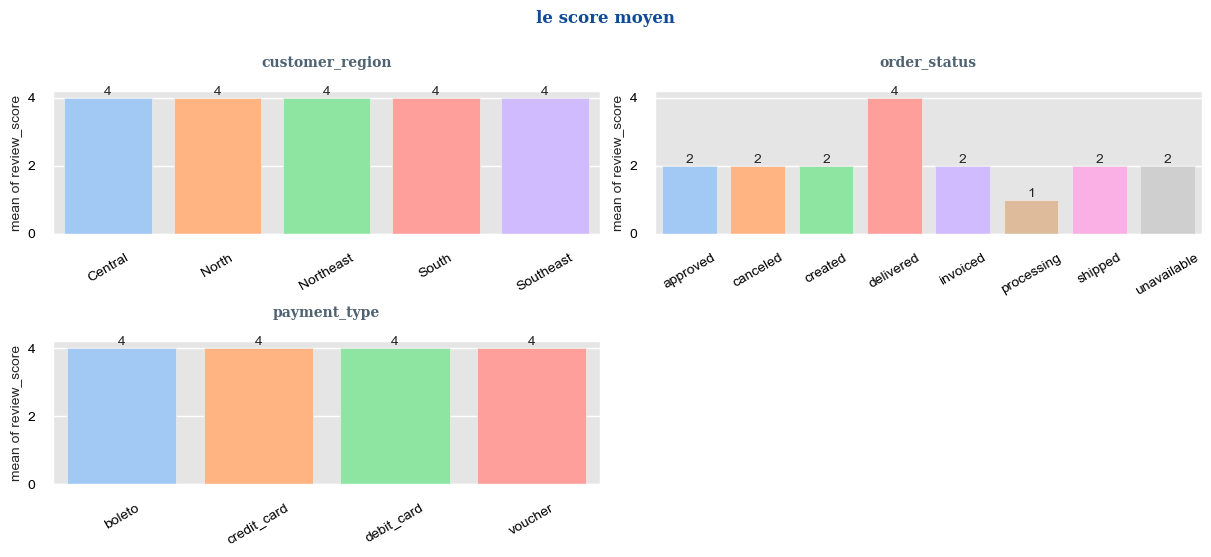

In [205]:
listvar=['customer_region','order_status','payment_type']

g_multi_agg(df_olist, listvar, 'review_score', 'mean',
            title = r"le score moyen" "\n \n \n\n",
            ncols=2, figsize=(12, 5), labelsize=10, rotation=30, xlabsize=10, ylabsize=10, 
            palette='pastel', saturation=1, graphName='',  shareyy= False, sharexx= False)

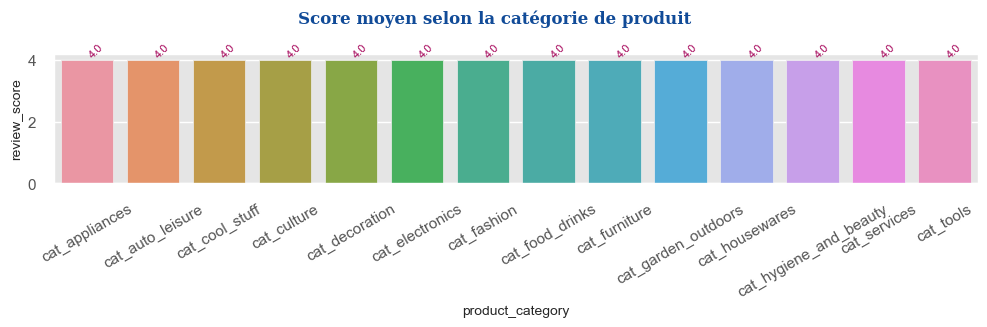

In [206]:
barplot3(df_olist,varX='product_category',varY='review_score',agg_func='mean',xrotation=30,labrotation=45,
             barlabsize=8,labcolor='m',figsize=(10,3), graphName='',
        title='Score moyen selon la catégorie de produit''\n\n')

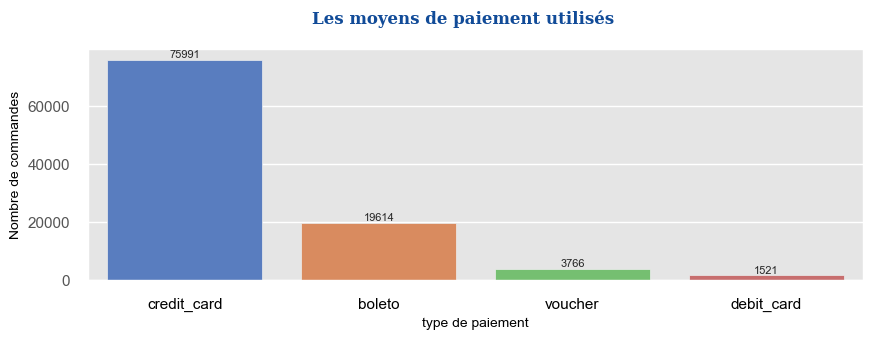

In [207]:
barplot2(df_olist, 'payment_type', 'order_id', agg_func='nunique',
         title="Les moyens de paiement utilisés" "\n",
         xtitle='type de paiement', ytitle='Nombre de commandes',
         figsize=(10,3), labelsize=8, rotation=0, graphName = 'MoyenDePaiement.png',
         style='fast')

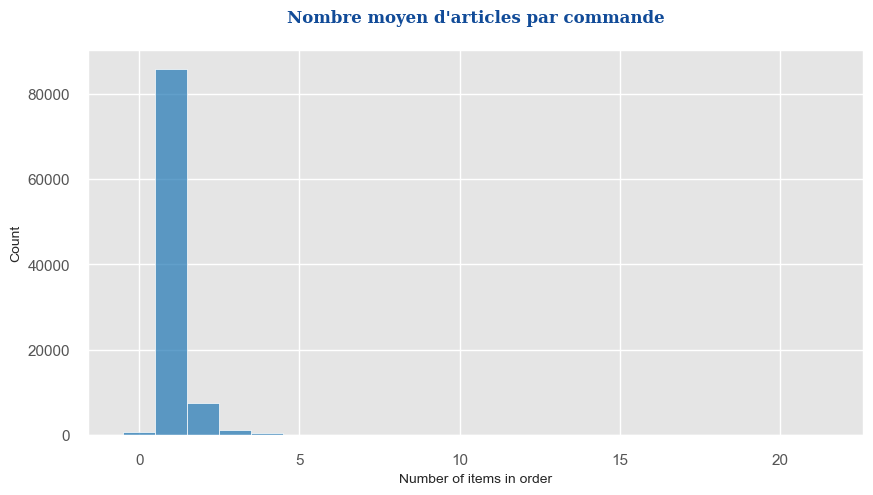

In [208]:
df_olist1= pd.merge(df_customers, df_orders, on=["customer_id"],how="left")
df_olist1= df_olist1.merge(df_order_items, on=["order_id"],how="left")


items_per_order = df_olist1.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
items_per_customers = items_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})


fig = plt.figure(figsize=(10, 5))
sns.histplot(data = items_per_customers,
             x="order_item_id", discrete=True,
             edgecolor="white", color='#1f77b4', alpha=0.7)
plt.xlabel("Number of items in order")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict=font_title2)
plt.show()

### <font color="#337da4" id="5"> 5. Fusion des bases </font>
----------------------------

Nous allons fusionner toutes les tables pour en faire une base consolidée qui sera utilisée pour nos analyses.
Pour ce faire, nous allons utiliser ce schéma, [disponible](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) sur kaggle (onglet datacard).

<img src="shemadata.png"/>

In [209]:
def differenceKeys(data1,key1,data2,key2):
    print('Les keys presents dans les deux dataframes *{0}* & *{1}*:'.format(namestr(data1,globals())[0],
                                                                             namestr(data2,globals())[0]),
          len(list(set(data1[key1].unique().tolist()) & set(data2[key2].unique().tolist()))))
    print("Les keys presents uniquement dans *{}* :".format(namestr(data1,globals())[0]),
          len(list(set(data1[key1].unique().tolist()) - set(data2[key2].unique().tolist()))))
    print("Les keys presents uniquement dans *{}* :".format(namestr(data2,globals())[0]),
          len(list(set(data2[key2].unique().tolist()) - set(data1[key1].unique().tolist()))))

    print()
    df0 = data1.loc[data1[key1].isin(list(set(data1[key1].unique().tolist()) & set(data2[key2].unique().tolist()))),:]
    df1 = data1.loc[data1[key1].isin(list(set(data1[key1].unique().tolist()) - set(data2[key2].unique().tolist()))),:]
    df2 = data2.loc[data2[key2].isin(list(set(data2[key2].unique().tolist()) - set(data1[key1].unique().tolist()))),:]
    return print(' '), df0, df1, df2

In [210]:
differenceKeys(df_customers,'customer_id', df_orders, 'customer_id')[0]
differenceKeys(df_orders,'order_id', df_order_reviews, 'order_id')[0]
differenceKeys(df_orders,'order_id', df_order_items, 'order_id')[0]
differenceKeys(df_customers,'customer_zip_code_prefix', df_geolocation, 'geolocation_zip_code_prefix')[0]
differenceKeys(df_products,'product_category_name', df_category_name, 'product_category_name')[0]

Les keys presents dans les deux dataframes *df_customers* & *df_orders*: 99440
Les keys presents uniquement dans *df_customers* : 1
Les keys presents uniquement dans *df_orders* : 0

 
Les keys presents dans les deux dataframes *df_orders* & *df_order_reviews*: 98672
Les keys presents uniquement dans *df_orders* : 768
Les keys presents uniquement dans *df_order_reviews* : 1

 
Les keys presents dans les deux dataframes *df_orders* & *df_order_items*: 98665
Les keys presents uniquement dans *df_orders* : 775
Les keys presents uniquement dans *df_order_items* : 1

 
Les keys presents dans les deux dataframes *df_customers* & *df_geolocation*: 14830
Les keys presents uniquement dans *df_customers* : 157
Les keys presents uniquement dans *df_geolocation* : 0

 
Les keys presents dans les deux dataframes *df_products* & *df_category_name*: 71
Les keys presents uniquement dans *df_products* : 3
Les keys presents uniquement dans *df_category_name* : 0

 


In [211]:
# df_products['geolocation_lng_means'] = df_products\
#                 .groupby(by='product_category_name')['geolocation_lng']\
#                 .transform('mean')
df_olist= df_products.merge(df_category_name, on='product_category_name', how="left")
apercu([df_olist],['df_olist'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_olist,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, product_category",32951,11,0,3694,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, product_category"


In [212]:
df_orders=df_orders.copy()
df_orders['mois_num']=df_orders['order_purchase_timestamp'].dt.month_name().str[:3]

df_orders['season']=df_orders['order_purchase_timestamp'].dt.quarter
season_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'automn'}
df_orders['season'] = df_orders['season'].replace(season_dict)

df_orders['week']=df_orders['order_purchase_timestamp'].dt.day_name().str[:3] # dayofweek
df_orders['hour']=df_orders['order_purchase_timestamp'].dt.hour

cat_day_of_week = pd.CategoricalDtype(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],ordered=True,)
cat_month = pd.CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'], 
                             ordered=True,)

df_orders['week'] = df_orders['week'].astype(cat_day_of_week)
df_orders['mois_num'] = df_orders['mois_num'].astype(cat_month)

df_orders[['order_purchase_timestamp','mois_num', 'season', 'week']]

,order_purchase_timestamp,mois_num,season,week
0,2017-10-02 10:56:33,Oct,automn,Mon
1,2018-07-24 20:41:37,Jul,summer,Tue
2,2018-08-08 08:38:49,Aug,summer,Wed
3,2017-11-18 19:28:06,Nov,automn,Sat
4,2018-02-13 21:18:39,Feb,winter,Tue
...,...,...,...,...
99436,2017-03-09 09:54:05,Mar,winter,Thu
99437,2018-02-06 12:58:58,Feb,winter,Tue
99438,2017-08-27 14:46:43,Aug,summer,Sun
99439,2018-01-08 21:28:27,Jan,winter,Mon


In [213]:
df_olist= pd.merge(df_customers, df_orders, on="customer_id",how="left")
df_olist= df_olist.merge(df_order_reviews, on="order_id",how="left")
df_olist= df_olist.merge(df_order_items, on="order_id",how="left")
df_olist= df_olist.merge(df_products, on="product_id",how="left")
df_olist= df_olist.merge(df_order_payments, on="order_id",how="inner")
df_olist= df_olist.merge(df_category_name, on='product_category_name',how="left")
df_olist= df_olist.merge(df_sellers, on='seller_id',how="left").rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})
df_olist= df_olist.merge(df_geolocation, on="geolocation_zip_code_prefix", how="left")

df_olist=dedoublonner(df_olist)
df_olist.shape

(12058400, 52)

In [214]:
# df_olist['product_category']
apercu([df_olist],['df_olist'])

,datasets,columns,nb_lignes,nb_colonnes,doublons,nb_NaN,NaN_Columns
0,df_olist,"customer_id, customer_unique_id, geolocation_zip_code_prefix, customer_city, customer_state, customer_state_name, customer_region, order_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, mois_num, season, week, hour, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, payment_sequential, payment_type, payment_installments, payment_value, product_category_name_english, product_category, seller_zip_code_prefix, seller_city, seller_state, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, geometry",12058400,52,0,1607378,"review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, product_category, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, geometry"


In [215]:
df_olist.head()

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region,order_id,order_status,order_purchase_timestamp,...,product_category_name_english,product_category,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,office_furniture,cat_furniture,8577,itaquaquecetuba,SP,-20.509897,-47.397866,franca,SP,POINT (-47.39787 -20.50990)
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,office_furniture,cat_furniture,8577,itaquaquecetuba,SP,-20.497396,-47.399241,franca,SP,POINT (-47.39924 -20.49740)
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,office_furniture,cat_furniture,8577,itaquaquecetuba,SP,-20.510459,-47.399553,franca,SP,POINT (-47.39955 -20.51046)
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,office_furniture,cat_furniture,8577,itaquaquecetuba,SP,-20.480940,-47.394161,franca,SP,POINT (-47.39416 -20.48094)
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,São Paulo,Southeast,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,office_furniture,cat_furniture,8577,itaquaquecetuba,SP,-20.515413,-47.398194,franca,SP,POINT (-47.39819 -20.51541)


#### <font color='#337da4' font-size='90%' text-align='left'> Nettoyage de la base </font>
--------------------------------------------------

In [216]:
obsWithMissings(df_olist).head()

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region,order_id,order_status,order_purchase_timestamp,...,product_category_name_english,product_category,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
640,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Minas Gerais,Southeast,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,...,NaN,NaN,4142,sao paulo,SP,-19.579882,-42.645924,timoteo,MG,POINT (-42.64592 -19.57988)
641,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Minas Gerais,Southeast,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,...,NaN,NaN,4142,sao paulo,SP,-19.558462,-42.639557,timoteo,MG,POINT (-42.63956 -19.55846)
642,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Minas Gerais,Southeast,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,...,NaN,NaN,4142,sao paulo,SP,-19.553566,-42.642977,timoteo,MG,POINT (-42.64298 -19.55357)
643,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Minas Gerais,Southeast,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,...,NaN,NaN,4142,sao paulo,SP,-19.578248,-42.642731,timoteo,MG,POINT (-42.64273 -19.57825)
644,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Minas Gerais,Southeast,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,...,NaN,NaN,4142,sao paulo,SP,-19.584802,-42.648830,timoteo,MG,POINT (-42.64883 -19.58480)


-----
Certaines colonnes ***ne sont pas pertinentes***. Nous allons les supprimer du dataframe.

In [217]:
delete_features=list(set(['review_comment_title', 'review_comment_message','review_creation_date', 
                          'review_answer_timestamp','geometry']))
df_olist.drop(delete_features,axis=1, errors='ignore', inplace=True)

---
Nous allons garder uniquement les commandes delivrées.

In [218]:
# df_olist=df_olist.loc[df_olist['order_status']=='delivered',:]
# Exploration par statut avant de filtrer
# erreur sur les dates (creation vs livraison)
# les commandes par statut

In [219]:
df_olist.loc[df_olist["payment_installments"] == 0]

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name_english,product_category,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [220]:
df_olist.loc[(df_olist["payment_value"] == 0)|(df_olist["payment_value"].isnull()),:]

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name_english,product_category,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2069874,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,Goiás,Central,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,...,0.0,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,-16.628877,-49.285241,goiania,GO
2069875,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,Goiás,Central,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,...,0.0,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,-16.624682,-49.297767,goiania,GO
2069876,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,Goiás,Central,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,...,0.0,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,-16.626113,-49.284973,goiania,GO
2069877,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,Goiás,Central,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,...,0.0,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,-16.628202,-49.301771,goiania,GO
2069878,8eab8f9b3c744b76b65f7a2c0c8f2d6c,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,Goiás,Central,45ed6e85398a87c253db47c2d9f48216,delivered,2017-06-08 21:18:45,...,0.0,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,-16.623638,-49.297505,goiania,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372634,648121b599d98c420ef93f6135f8c80c,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,Espírito Santo,Southeast,b23878b3e8eb4d25a158f57d96331b18,delivered,2017-05-27 19:20:24,...,0.0,consoles_games,cat_electronics,55325,brejao,PE,-20.809426,-40.635503,anchieta,ES
9372635,648121b599d98c420ef93f6135f8c80c,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,Espírito Santo,Southeast,b23878b3e8eb4d25a158f57d96331b18,delivered,2017-05-27 19:20:24,...,0.0,consoles_games,cat_electronics,55325,brejao,PE,-20.805644,-40.653253,anchieta,ES
9372636,648121b599d98c420ef93f6135f8c80c,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,Espírito Santo,Southeast,b23878b3e8eb4d25a158f57d96331b18,delivered,2017-05-27 19:20:24,...,0.0,consoles_games,cat_electronics,55325,brejao,PE,-20.805522,-40.650093,anchieta,ES
9372637,648121b599d98c420ef93f6135f8c80c,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,Espírito Santo,Southeast,b23878b3e8eb4d25a158f57d96331b18,delivered,2017-05-27 19:20:24,...,0.0,consoles_games,cat_electronics,55325,brejao,PE,-20.805781,-40.649017,anchieta,ES


In [221]:
df_olist.loc[df_olist["geolocation_lat"].isnull(),:]

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,customer_state_name,customer_region,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name_english,product_category,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
44399,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,District fédéral,Central,8e806cca085990fdc8483aeb130d1330,delivered,2017-11-24 13:33:42,...,71.14,perfumery,cat_hygiene_and_beauty,9015,santo andre,SP,NaN,NaN,NaN,NaN
48648,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,São Paulo,Southeast,71932b1adae11f63e4a454bb85d4235a,delivered,2017-04-21 22:16:56,...,65.89,toys,cat_auto_leisure,6440,barueri,SP,NaN,NaN,NaN,NaN
111456,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,Piauí,Northeast,d0bec96aad189992b278688279ba1511,delivered,2018-05-08 21:04:16,...,99.90,watches_gifts,cat_fashion,14050,ribeirao preto,SP,NaN,NaN,NaN,NaN
153576,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,District fédéral,Central,056349f85a73d794119c4286c95a52de,delivered,2017-03-03 14:21:58,...,27.04,furniture_decor,cat_decoration,14940,ibitinga,SP,NaN,NaN,NaN,NaN
160965,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,São Paulo,Southeast,17afedb7e5fad837f54bacf5c66c99f8,delivered,2017-10-01 11:21:12,...,70.91,auto,cat_auto_leisure,14020,ribeirao preto,SP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160847,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,Pará,North,e2f630b53cb2637be372c3810b089868,shipped,2017-07-26 11:44:28,...,175.32,watches_gifts,cat_fashion,5849,sao paulo,SP,NaN,NaN,NaN,NaN
12202625,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,Rio de Janeiro,Southeast,84a80b02b3af075990fc7d9d2369f066,delivered,2017-10-15 19:33:54,...,571.16,auto,cat_auto_leisure,79400,coxim,MS,NaN,NaN,NaN,NaN
12295052,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,Pernambouc,Northeast,19b6861ce084842fb4ec0cafc59deebe,delivered,2018-05-15 13:01:12,...,77.03,telephony,cat_electronics,13070,campinas,SP,NaN,NaN,NaN,NaN
12342248,ff09fd7b29e7488a8d8a20badcd8befe,8c21dd8c37144807c601f99f2a209dfb,72587,brasilia,DF,District fédéral,Central,157de1652c032429a625d034be79eeeb,delivered,2017-05-10 09:00:07,...,39.09,fashion_sport,cat_fashion,6038,osasco,SP,NaN,NaN,NaN,NaN


In [222]:
df_olist['payment_type'].unique()

array(['credit_card', 'debit_card', 'voucher', 'boleto'], dtype=object)

In [223]:
df_olist.groupby(['payment_type'])['payment_value'].sum().reset_index()

,payment_type,payment_value
0,boleto,4.277923e+08
1,credit_card,1.592345e+09
2,debit_card,2.710134e+07
3,voucher,4.214020e+07


----
Nous avons des valeurs manquantes dans la catégorie des produits. Nous allons imputer.    
Aussi, nous allons revoir les catégories en constituant des groupes. 

In [224]:
df_olist["product_category"].fillna(df_olist["product_category_name"], inplace=True)
df_olist["product_category"].fillna(value='No category', inplace=True)

In [225]:
df_olist["product_category"].unique()

array(['cat_furniture', 'cat_housewares', 'cat_auto_leisure',
       'cat_electronics', 'No category', 'cat_decoration',
       'cat_appliances', 'cat_hygiene_and_beauty', 'cat_tools',
       'cat_garden_outdoors', 'cat_fashion', 'cat_culture',
       'cat_food_drinks', 'cat_cool_stuff', 'cat_services',
       'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [226]:
df_olist.loc[df_olist["product_category"]=="portateis_cozinha_e_preparadores_de_alimentos",'product_category']="kitchen_laptops_and_food_preparators"

In [227]:
df_olist.loc[df_olist["product_category"]=="kitchen_laptops_and_food_preparators",'product_category']="cat_appliances"
df_olist.loc[df_olist["product_category"]=='pc_gamer','product_category']='cat_electronics'


In [228]:
# df_olist.rename(columns={"product_category": "product_category_name"}, inplace=True)

-----
Nous avons aussi des valeurs manquantes sur les dimensions des produits. 
Nous allons les imputer avec la moyenne des dimensions des produits de la meme catégorie. 


#### <font color='#337da4' font-size='90%' text-align='left'> Typage des variables </font>
--------------------------------------------------

Nous allons convertir les variables dates en format dates python. Ainsi, nous pourrions faire des calculs les différentes périodes qui s'écoulent entre les commandes, les expeditions, les livrasons, etc.

In [229]:
dates_features= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date',  'shipping_limit_date'] 
# 'review_creation_date', 'review_answer_timestamp'

df_olist[dates_features]=df_olist[dates_features].apply(pd.to_datetime,format='%Y-%m-%d %H:%M:%S.%f')

In [230]:
from pandas.api.types import CategoricalDtype

category_features=list(set(['customer_id', 'customer_unique_id', 'geolocation_zip_code_prefix', 'customer_city',
                     'customer_state', 'order_id', 'customer_id', 'order_status', 'order_id', 'order_item_id', 
                     'product_id',  'payment_type','review_id', 'product_id', 'seller_id','product_category', 
                     'product_category_name', 'product_category_name_english','geolocation_state','geolocation_city',
                           'customer_region','customer_city','seller_state','seller_city']))
df_olist[category_features] = df_olist[category_features].astype('category')

df_olist.dtypes

customer_id                            category
customer_unique_id                     category
geolocation_zip_code_prefix            category
customer_city                          category
customer_state                         category
customer_state_name                      object
customer_region                        category
order_id                               category
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
mois_num                               category
season                                   object
week                                   category
hour                                    float64
review_id                              category
review_score                            float64
order_item_id                          c

### <font color="#337da4" id="6">6. Features engineering </font>
----------------------------
Dans cette partie, nous allons nous mettre en place un dataframe ***centré sur le client***, vu que l'objectif est de faire une segmentation des clients, en créant de nouvelles variables. En guise de rappel, ***l'identifiant unique du client*** est contenu dans la variable ***`customer_unique_id`***.

##### <font color="#337da4" id="5">Délai de livraison </font>

Ici, nous allons créer une variable contenant le **délai le livraison de chaque commande**. 

In [231]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,mois_num,season,week,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Oct,automn,Mon,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Jul,summer,Tue,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Aug,summer,Wed,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Nov,automn,Sat,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Feb,winter,Tue,21


In [232]:
olist_order=df_orders.copy()
olist_order['order_delivery_delay'] = (df_orders['order_delivered_customer_date']
                                  -df_orders['order_purchase_timestamp']).dt.round('1d').dt.days
olist_order=olist_order[['customer_id',  'order_delivery_delay']]


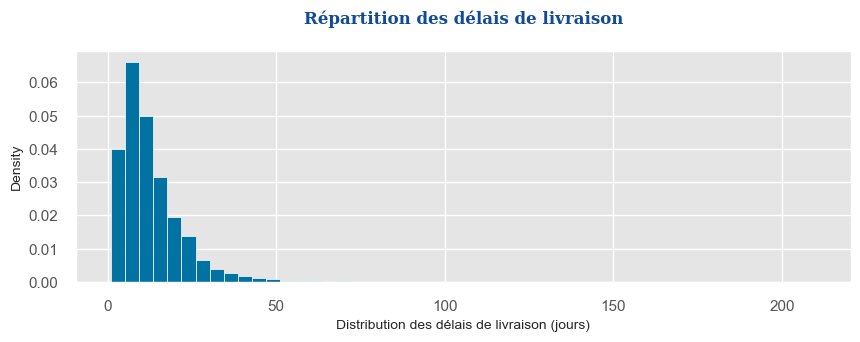

In [233]:
fig = plt.figure(figsize=(10, 3))
sns.histplot(data=olist_order, x='order_delivery_delay', stat="density", edgecolor="white",
              color='b', bins=50, alpha=1) #, kde=True
plt.xlabel("Distribution des délais de livraison (jours)")
plt.title(f"Répartition des délais de livraison\n",
          fontdict=font_title2)
plt.show()

In [234]:
olist_order = (olist_order.merge(df_customers[['customer_id','customer_unique_id']],on='customer_id')
               .groupby("customer_unique_id")
               .agg({"order_delivery_delay": "mean",})
               .rename(columns={"order_delivery_delay": "delivery_delay_mean",})
               .reset_index())
olist_order.head()

,customer_unique_id,delivery_delay_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0
2,0000f46a3911fa3c0805444483337064,26.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0
4,0004aac84e0df4da2b147fca70cf8255,13.0


##### <font color="#337da4"> Nombre de produits par catégories </font>

Ici, nous allons calculer, pour chaque catégorie de produits, le nombre d'achat effectué par chaque client. 

In [235]:
nb_items_cat = (df_olist.drop_duplicates(subset=['order_id','order_item_id'])
                        .groupby(['customer_unique_id','product_category'])
                        .agg({'order_item_id':'count',# 'order_status':'count',
                             }).unstack()
                       )

nb_items_cat.columns=nb_items_cat.columns.droplevel(0)
nb_items_cat

nb_items_cat.fillna(0, inplace=True)
nb_items_cat['total_items'] = nb_items_cat.sum(axis=1, numeric_only=True)
# Poids de chaque catégories dans l'ens des items achetés.
for col in nb_items_cat.columns:
    if (col != 'total_items'):
        nb_items_cat[col] = (nb_items_cat[col]/nb_items_cat['total_items'])
        
nb_items_cat=nb_items_cat.reset_index()
nb_items_cat.drop(columns=['No category'], axis=1, inplace=True)
nb_items_cat

product_category,customer_unique_id,cat_appliances,cat_auto_leisure,cat_cool_stuff,cat_culture,cat_decoration,cat_electronics,cat_fashion,cat_food_drinks,cat_furniture,cat_garden_outdoors,cat_housewares,cat_hygiene_and_beauty,cat_services,cat_tools,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
95415,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
95416,ffff371b4d645b6ecea244b27531430a,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
95417,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [236]:
nb_status_order = (df_olist.drop_duplicates(subset=['order_id'])
                        .groupby(['customer_unique_id','order_status'])
                        .agg({'order_id':'count',# 'order_status':'count',
                             }).unstack()
                       )

nb_status_order.columns=nb_status_order.columns.droplevel(0)

nb_status_order.fillna(0, inplace=True)
nb_status_order['total_status'] = nb_status_order.sum(axis=1, numeric_only=True)
# Poids de chaque catégories dans l'ens des items achetés.
for col in nb_status_order.columns:
    if (col != 'total_status'):
        nb_status_order[col] = (nb_status_order[col]/nb_status_order['total_status'])
        
nb_status_order=nb_status_order.reset_index()
# nb_status_order.drop(columns=['No category'], axis=1, inplace=True)
nb_status_order.head(5)

order_status,customer_unique_id,approved,canceled,delivered,invoiced,processing,shipped,unavailable,total_status
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0000f46a3911fa3c0805444483337064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


##### <font color="#337da4"> Commandes et mode de paiement des clients </font>

Pour le dataset des paiements, vous allons créer de nouvelles variables à savoir :

- Le nombre moyen d'article par commande,
- Le nombre de moyens de paiement différents utilisés sur la commande.
- Le nombre d'échéances totales de la commande.

In [237]:
df_olist2= pd.merge(df_customers, df_orders, on="customer_id",how="left")
df_olist2= df_olist2.merge(df_order_payments, on="order_id",how="left")
df_olist2= df_olist2.merge(df_order_items, on="order_id",how="left")

nbItems_per_order = (df_olist2.drop_duplicates(subset=['order_id','order_item_id'])
                     .groupby(['customer_unique_id','order_id'])
                     .agg({'order_item_id': 'count', 
                           'payment_sequential': 'count',
                           'payment_installments': 'sum',}))

nbItems_per_order = (nbItems_per_order.groupby("customer_unique_id")
                     .agg({'order_item_id': 'mean',
                           'payment_sequential': 'mean',
                           'payment_installments': 'mean',})
                     .rename(columns={"order_item_id": "nbitem_order_mean",
                                      "payment_sequential": "payment_sequential_mean",
                                      "payment_installments": "payment_installments_mean",
                                     })
                     .reset_index())
nbItems_per_order

,customer_unique_id,nbitem_order_mean,payment_sequential_mean,payment_installments_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,1.0,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,1.0
2,0000f46a3911fa3c0805444483337064,1.0,1.0,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,1.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,1.0,1.0,6.0
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2.0,2.0,20.0
96091,fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,1.0
96092,ffff371b4d645b6ecea244b27531430a,1.0,1.0,1.0
96093,ffff5962728ec6157033ef9805bacc48,1.0,1.0,5.0


------------
Nous allons regarder le temps écoulé entre le premier achat et le dernier achat.
Puis, nous allons calculer le **nombre de jours moyen** entre deux deux commandes. 


In [238]:
nbJours_MinMax = (df_olist.drop_duplicates(subset=['order_id'])
                  .groupby("customer_unique_id")
                  .agg({"order_purchase_timestamp": ["min","max"]})).reset_index()
cols_name=['customer_unique_id','first_purchase_date', 'last_purchase_date']

# creation du dataframe.
nbJours_MinMax = pd.DataFrame(data = nbJours_MinMax.values, 
                  index = nbJours_MinMax.index, 
                  columns = cols_name)
# derniere date dans la base de données
max_date = df_orders["order_purchase_timestamp"].max()

# Temps écoulé entre les achats
nbJours_MinMax["nbj_bet_order"] = [(y[2] - y[1]).round('1d').days if y[2] != y[1] 
                                    else (max_date - y[1]).round('1d').days 
                                    for x,y in nbJours_MinMax.iterrows()]

nbJours_MinMax.head(3)

,customer_unique_id,first_purchase_date,last_purchase_date,nbj_bet_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,586


In [239]:
# Group by customers 
customers_olist = (df_olist.drop_duplicates(subset=['order_id','order_item_id'])
        .groupby("customer_unique_id")
        .agg({"order_id": "nunique",
              "price": "sum",
              "freight_value": "sum",
              "review_score": "mean",}))

# Rename columns
customers_olist = (customers_olist.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "review_score": "mean_review_score",})).reset_index()

customers_olist['total']=customers_olist[['total_freight','total_spend']].sum(axis=1)
customers_olist['poids_freight']=customers_olist['total_freight']/customers_olist['total']
customers_olist.drop(columns=['total'], inplace=True)
customers_olist.head(5)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_review_score,poids_freight
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,5.0,0.084567
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,4.0,0.304892
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,3.0,0.199722
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,4.0,0.404172
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,5.0,0.085784


In [240]:
olist_mostFreq=mostFreqValues(df_olist.drop_duplicates(subset=['order_id']), 
               keylist=['customer_unique_id'], 
               varlist= ['payment_type','mois_num', 'season', 'week', 'hour'])

In [241]:
Customers_infog=df_customers[['customer_unique_id','customer_city', 'customer_state', 'customer_state_name',
       'customer_region']]

In [242]:
from functools import reduce
def pandasMerge(tableList,on:list, how=None):
    return reduce(lambda first, second: first.merge(second,on=on, how=how), tableList)


listables=[Customers_infog, customers_olist, olist_order, nb_items_cat, nb_status_order,
           nbItems_per_order, nbJours_MinMax, olist_mostFreq]

df_olist_final=pandasMerge(listables,['customer_unique_id'], how='left')

df_olist_final["nbj_bet_order"] = df_olist_final["nbj_bet_order"] / df_olist_final["nb_orders"]
df_olist_final = df_olist_final.rename(columns={"nbj_bet_order": "nbj_bet_order_mean"})
df_olist_final.rename(columns={'mois_num':'mois_favorite','season':'season_favorite',
                               'week':'week_favorite','hour':'hour_favorite'},inplace=True)
df_olist_final   

,customer_unique_id,customer_city,customer_state,customer_state_name,customer_region,nb_orders,total_spend,total_freight,mean_review_score,poids_freight,...,payment_sequential_mean,payment_installments_mean,first_purchase_date,last_purchase_date,nbj_bet_order_mean,payment_type,mois_favorite,season_favorite,week_favorite,hour_favorite
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,São Paulo,Southeast,1.0,124.99,21.88,4.0,0.148975,...,1.0,2.0,2017-05-16 15:05:35,2017-05-16 15:05:35,519.0,credit_card,May,spring,Tue,15.0
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,São Paulo,Southeast,1.0,289.00,46.48,5.0,0.138548,...,1.0,8.0,2018-01-12 20:48:24,2018-01-12 20:48:24,278.0,credit_card,Jan,winter,Fri,20.0
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,São Paulo,Southeast,1.0,139.94,17.79,5.0,0.112788,...,1.0,7.0,2018-05-19 16:07:45,2018-05-19 16:07:45,151.0,credit_card,May,spring,Sat,16.0
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,São Paulo,Southeast,1.0,149.94,23.36,5.0,0.134795,...,1.0,1.0,2018-03-13 16:06:38,2018-03-13 16:06:38,218.0,credit_card,Mar,winter,Tue,16.0
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,São Paulo,Southeast,1.0,230.00,22.25,5.0,0.088206,...,1.0,8.0,2018-07-29 09:51:30,2018-07-29 09:51:30,80.0,credit_card,Jul,summer,Sun,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,São Paulo,Southeast,1.0,74.90,13.88,4.0,0.156342,...,1.0,6.0,2018-04-07 15:48:17,2018-04-07 15:48:17,193.0,credit_card,Apr,spring,Sat,15.0
99437,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,São Paulo,Southeast,1.0,114.90,14.16,5.0,0.109716,...,1.0,3.0,2018-04-04 08:20:22,2018-04-04 08:20:22,196.0,credit_card,Apr,spring,Wed,8.0
99438,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,Ceará,Northeast,1.0,37.00,19.04,1.0,0.339757,...,1.0,5.0,2018-04-08 20:11:50,2018-04-08 20:11:50,192.0,credit_card,Apr,spring,Sun,20.0
99439,73c2643a0a458b49f58cea58833b192e,canoas,RS,Rio Grande do Sul,South,1.0,689.00,22.07,5.0,0.031038,...,1.0,2.0,2017-11-03 21:08:33,2017-11-03 21:08:33,348.0,credit_card,Nov,automn,Fri,21.0


In [243]:
df_olist_final.isna().sum()
df_olist_final.loc[df_olist_final.nb_orders.isna(),'customer_unique_id':'delivery_delay_mean'].head() 

,customer_unique_id,customer_city,customer_state,customer_state_name,customer_region,nb_orders,total_spend,total_freight,mean_review_score,poids_freight,delivery_delay_mean
46,233896de79986082f1f479f1f85281cb,ituiutaba,MG,Minas Gerais,Southeast,NaN,NaN,NaN,NaN,NaN,25.0
288,0071f46a072a9ae25bbe4438b15efe9c,aracatuba,SP,São Paulo,Southeast,NaN,NaN,NaN,NaN,NaN,37.0
373,035f60af6e7d7f78470e9443be08d339,aperibe,RJ,Rio de Janeiro,Southeast,NaN,NaN,NaN,NaN,NaN,22.0
383,340152332a04149987a705602615f0d0,maringa,PR,Paraná,South,NaN,NaN,NaN,NaN,NaN,27.0
556,d0e87d00021530383c16452a39a393ba,porto seguro,BA,Bahia,Northeast,NaN,NaN,NaN,NaN,NaN,29.0


In [244]:
df_olist_final=df_olist_final.loc[~(df_olist_final.nb_orders.isna()),:]
df_olist_final['mean_review_score'].fillna(df_olist_final['mean_review_score'].mode().iloc[0],inplace=True)

df_olist_final.isna().sum()

customer_unique_id           0
customer_city                0
customer_state               0
customer_state_name          0
customer_region              0
nb_orders                    0
total_spend                  0
total_freight                0
mean_review_score            0
poids_freight                0
delivery_delay_mean          0
cat_appliances               0
cat_auto_leisure             0
cat_cool_stuff               0
cat_culture                  0
cat_decoration               0
cat_electronics              0
cat_fashion                  0
cat_food_drinks              0
cat_furniture                0
cat_garden_outdoors          0
cat_housewares               0
cat_hygiene_and_beauty       0
cat_services                 0
cat_tools                    0
total_items                  0
approved                     0
canceled                     0
delivered                    0
invoiced                     0
processing                   0
shipped                      0
unavaila

#### <font color='#337da4' text-align='left'> Repartition des variables </font>

----------

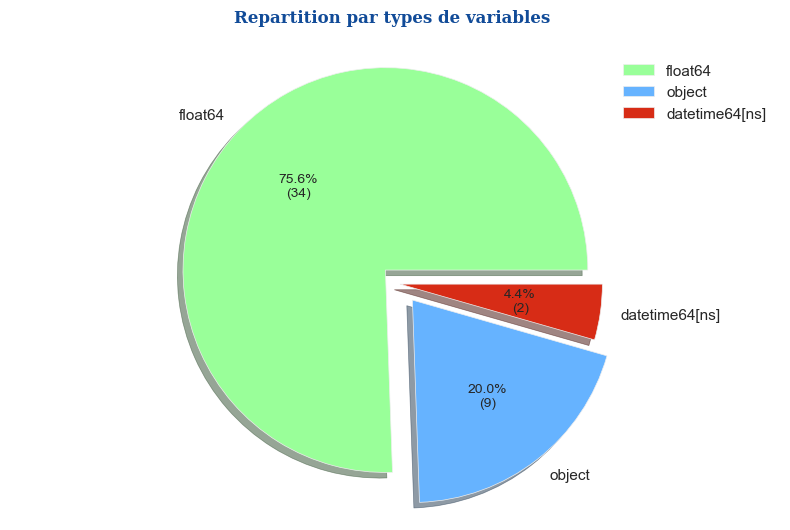

,Types de variables,Nombre
0,float64,34
1,object,9
2,datetime64[ns],2


In [245]:
repartitionTypeVar(df_olist_final, figsize=(8, 5), 
                   title="Repartition par types de variables \n",
                   graphName= 'repartitionvar.png')

-----------
- Certains clients n'ont pas passé de commandes.   
- Ces clients seront supprimés de la base.
- Pour ce qui est du score attribué, une impuation par le mode sera effectuée. 

#### <font color='#337da4' text-align='left'> Test de normalité </font>

----------

In [246]:
numeric_features=selectionVar(df_olist_final, typevar=np.number)

for var in numeric_features:
    test_AndersonDarling(df_olist_final, var,seuil=1)

Distribution normale nb_orders : False
Distribution normale total_spend : False
Distribution normale total_freight : False
Distribution normale mean_review_score : False
Distribution normale poids_freight : False
Distribution normale delivery_delay_mean : False
Distribution normale cat_appliances : False
Distribution normale cat_auto_leisure : False
Distribution normale cat_cool_stuff : False
Distribution normale cat_culture : False
Distribution normale cat_decoration : False
Distribution normale cat_electronics : False
Distribution normale cat_fashion : False
Distribution normale cat_food_drinks : False
Distribution normale cat_furniture : False
Distribution normale cat_garden_outdoors : False
Distribution normale cat_housewares : False
Distribution normale cat_hygiene_and_beauty : False
Distribution normale cat_services : False
Distribution normale cat_tools : False
Distribution normale total_items : False
Distribution normale approved : False
Distribution normale canceled : False
Di

----------
Les variables numériques de la base ne suivent pas une loi normale.     
Ainsi, l'analyse des corrélations se fera avec le ***test de Spearman.***

### <font color="#337da4" id="7"> 7. Variables RFM </font>
-----------------

In [247]:
df_customers.to_csv('df_customers.csv', index=False)
df_orders.to_csv('df_orders.csv', index=False)
df_order_payments.to_csv('df_order_payments.csv', index=False)
df_order_items.to_csv('df_order_items.csv', index=False)
df_order_reviews.to_csv('df_order_reviews.csv', index=False)

df_olist1= pd.merge(df_customers, df_orders, on="customer_id", how="left")
df_olist1= df_olist1.merge(df_order_payments, on="order_id", how="left")
df_olist1= df_olist1.merge(df_order_items, on="order_id", how="left")

df_olist1=df_olist.drop_duplicates(subset=['order_id'])
max_date = df_olist1['order_purchase_timestamp'].max() # +timedelta(days=1)
print(max_date)

2018-09-03 09:06:57


In [248]:
# Creation de la table RFM
df_Olist_rfm= (df_olist1.groupby('customer_unique_id')
               .agg({'order_purchase_timestamp': lambda date: (max_date - date.max()).days,
                     'order_id': lambda num: len(num),
                     'payment_value': lambda price: price.sum()}).reset_index()
               .rename(columns={'order_purchase_timestamp':'recency',
                      'order_id': 'frequency',
                      'payment_value':'monetary',}))
               
# Renommer les colonnes
df_Olist_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [249]:
df_Olist_rfm.isna().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
dtype: int64

In [250]:
# Calcul de la recence
df=df_olist1
df_recency = df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.columns = ['customer_unique_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency2'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency2
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [251]:
# Calcul de la fréquence
frequency_df = df.drop_duplicates().groupby(by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency2']
frequency_df.head()

,customer_unique_id,Frequency2
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [252]:
# Caclcul de montant
# df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary2']
monetary_df.head()

,customer_unique_id,Monetary2
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [253]:
df_test=pandasMerge([df_Olist_rfm,df_recency,frequency_df,monetary_df],
                    on=['customer_unique_id'],
                    how='left')
df_test.head()

,customer_unique_id,recency,frequency,monetary,LastPurchaseDate,Recency2,Frequency2,Monetary2
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,2018-05-10 10:56:27,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,2018-05-07 11:11:27,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22,2017-03-10 21:05:03,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2017-10-12 20:29:41,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2017-11-14 19:45:42,292,1,196.89


In [254]:
df_test.loc[~(df_test.Frequency2==df_test.frequency),:].head()

,customer_unique_id,recency,frequency,monetary,LastPurchaseDate,Recency2,Frequency2,Monetary2


In [255]:
df_olist_final=pd.merge(df_olist_final, df_Olist_rfm, on='customer_unique_id', how='left')
df_olist_final

,customer_unique_id,customer_city,customer_state,customer_state_name,customer_region,nb_orders,total_spend,total_freight,mean_review_score,poids_freight,...,last_purchase_date,nbj_bet_order_mean,payment_type,mois_favorite,season_favorite,week_favorite,hour_favorite,recency,frequency,monetary
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,São Paulo,Southeast,1.0,124.99,21.88,4.0,0.148975,...,2017-05-16 15:05:35,519.0,credit_card,May,spring,Tue,15.0,474,1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,São Paulo,Southeast,1.0,289.00,46.48,5.0,0.138548,...,2018-01-12 20:48:24,278.0,credit_card,Jan,winter,Fri,20.0,233,1,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,São Paulo,Southeast,1.0,139.94,17.79,5.0,0.112788,...,2018-05-19 16:07:45,151.0,credit_card,May,spring,Sat,16.0,106,1,157.73
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,São Paulo,Southeast,1.0,149.94,23.36,5.0,0.134795,...,2018-03-13 16:06:38,218.0,credit_card,Mar,winter,Tue,16.0,173,1,173.30
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,São Paulo,Southeast,1.0,230.00,22.25,5.0,0.088206,...,2018-07-29 09:51:30,80.0,credit_card,Jul,summer,Sun,9.0,35,1,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98750,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,São Paulo,Southeast,1.0,74.90,13.88,4.0,0.156342,...,2018-04-07 15:48:17,193.0,credit_card,Apr,spring,Sat,15.0,148,1,88.78
98751,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,São Paulo,Southeast,1.0,114.90,14.16,5.0,0.109716,...,2018-04-04 08:20:22,196.0,credit_card,Apr,spring,Wed,8.0,152,1,129.06
98752,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,Ceará,Northeast,1.0,37.00,19.04,1.0,0.339757,...,2018-04-08 20:11:50,192.0,credit_card,Apr,spring,Sun,20.0,147,1,56.04
98753,73c2643a0a458b49f58cea58833b192e,canoas,RS,Rio Grande do Sul,South,1.0,689.00,22.07,5.0,0.031038,...,2017-11-03 21:08:33,348.0,credit_card,Nov,automn,Fri,21.0,303,1,711.07


In [256]:
df_olist_final[['nb_orders', 'total_spend', 'total_freight', 'poids_freight','monetary']]

,nb_orders,total_spend,total_freight,poids_freight,monetary
0,1.0,124.99,21.88,0.148975,146.87
1,1.0,289.00,46.48,0.138548,335.48
2,1.0,139.94,17.79,0.112788,157.73
3,1.0,149.94,23.36,0.134795,173.30
4,1.0,230.00,22.25,0.088206,252.25
...,...,...,...,...,...
98750,1.0,74.90,13.88,0.156342,88.78
98751,1.0,114.90,14.16,0.109716,129.06
98752,1.0,37.00,19.04,0.339757,56.04
98753,1.0,689.00,22.07,0.031038,711.07


### <font color="#337da4" id="8"> 8. Selection de variables </font>
-------------------------

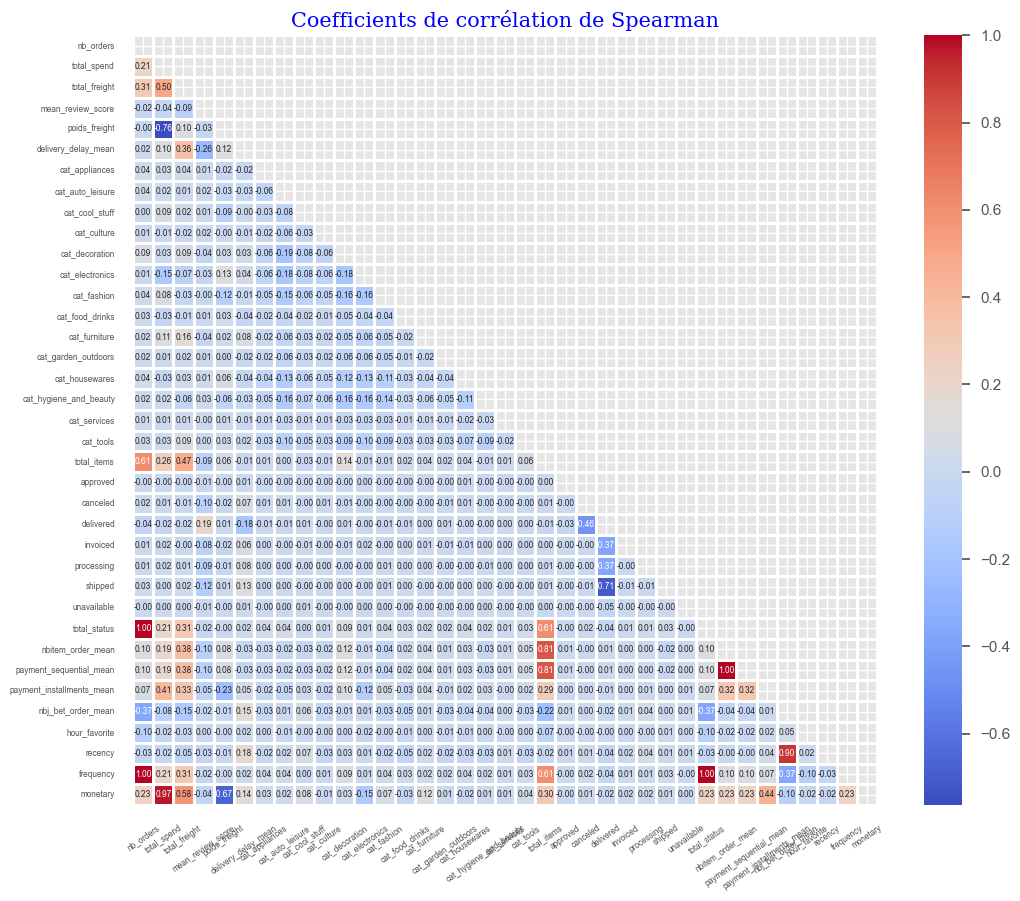

In [257]:
matriceCorrelation(df_olist_final, graphName='correlation.png', figsize=(12, 10))

---------
- Certaines variables sont ***fortement correlées***. 
- Nous allons éliminer les paires de variables ***fortement correlées***
- le seuil retenu est ***0.70***.

In [258]:
strongCorr(df_olist_final, threshold = 0.7)

,level_0,level_1,corr_coeff
32,nb_orders,total_status,1.000000
42,payment_sequential_mean,nbitem_order_mean,1.000000
46,total_status,frequency,1.000000
10,total_spend,monetary,0.971199
8,nbj_bet_order_mean,recency,0.904002
4,nbitem_order_mean,total_items,0.809825
6,payment_sequential_mean,total_items,0.809825
2,shipped,delivered,-0.708849
0,poids_freight,total_spend,-0.764017


In [259]:
features_to_drop=['total_status','total_items','payment_sequential_mean','shipped']
df_olist_final.drop(features_to_drop, axis=1, errors='ignore', inplace=True)

### <font color="#337da4" id="9"> 9. Exportation de la base </font>
----------------------------

Nous allons exporter la base finale avant la segmentation proprement dite.

In [260]:
df_olist_final.to_csv('df_olist_final.csv', index=False)
df_Olist_rfm.to_csv('df_Olist_rfm.csv', index=False)